In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train = pd.read_csv('./data/train_stage2_update_20200320.csv')
test = pd.read_csv('./data/test_stage2_update_20200320.csv')

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_y = pd.read_csv('./data/train_label.csv').Label

In [41]:
train['label'] = train_y

In [42]:
train[train.label==0].shape

(13425, 665)

In [43]:
train[train.label==1].shape

(941, 665)

In [44]:
13425/941

14.26673751328374

In [ ]:
# 整体分布
stats = []
for col in feat_imp:
    stats.append((col, train[col].nunique(), train[col].isnull().sum()*100/train.shape[0], 
                 train[col].value_counts(normalize=True, dropna=False).values[0]*100, train[col].dtype))
stat_df = pd.DataFrame(stats, columns=['Feature', 'Nunique', 'Percentage of missing', 
                                       'Percentage of values in the biggest category', 'dtype'])
stat_df

In [ ]:
test = pd.read_csv('./data/test_stage2_update_20200320.csv')
stats = []
for col in feat_imp:
    stats.append((col, test[col].nunique(), test[col].isnull().sum()*100/test.shape[0], 
                 test[col].value_counts(normalize=True, dropna=False).values[0]*100, test[col].dtype))
stat_df = pd.DataFrame(stats, columns=['Feature', 'Nunique', 'Percentage of missing', 
                                       'Percentage of values in the biggest category', 'dtype'])
stat_df

经数据统计发现关键特征在训练集和测试集上的分布、缺失情况基本一致，初步分析过拟合情况较轻

In [16]:
# 缺失程度
miss = train.isnull().sum()/train.shape[0]
miss.sort_values(ascending=False)

140类诉讼数量    1.000000
215类诉讼数量    1.000000
202类诉讼数量    1.000000
205类诉讼数量    1.000000
206类诉讼数量    1.000000
              ...   
登记注册类型代码    0.019978
纳税人状态代码     0.019978
教育费         0.000000
经营范围        0.000000
ID          0.000000
Length: 664, dtype: float64

In [3]:
import pandas_profiling
# 利用工具生成数据集报告

In [4]:
feat_imp = pd.read_csv('imp.csv')
feat_imp = feat_imp[:10].feature.tolist()

In [7]:
pfr = pandas_profiling.ProfileReport(train[feat_imp])
pfr.to_file("./example.html")

In [8]:
pfr = pandas_profiling.ProfileReport(test[feat_imp])
pfr.to_file("./example_test.html")

In [ ]:
#处理离散点
feat_imp = ['企业所得税','城建税','增值税','印花税','教育费','年度参保总额',
            '货币资金_年末数','行业代码','最新参保人数','注册资本','货币资金_年初数',
            "经营范围",'投资总额','行业门类','企业类型','其他应收款_年末数','登记注册类型代码',
            '登记机关','资本变更前','流动资产合计_年初数','其他应收款_年初数','流动资产合计_年末数',
            '管辖机关','固定资产合计_年初数','未分配利润_年末数','非流动资产合计_年初数']

for col in transform_value_feature+user_fea+log_features:
    ulimit=np.percentile(train_data[col].values,99.9)
    llimit=np.percentile(train_data[col].values,0.1)
    train_data.loc[train_data[col]>ulimit,col]=ulimit
    train_data.loc[train_data[col]<llimit,col]=llimit

D:\anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


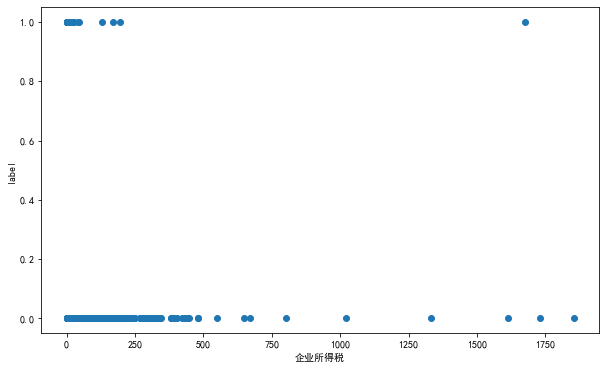

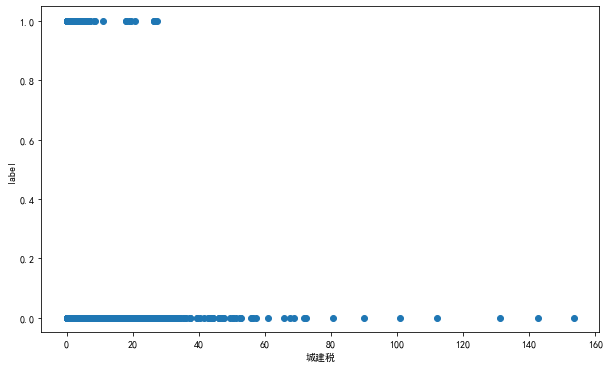

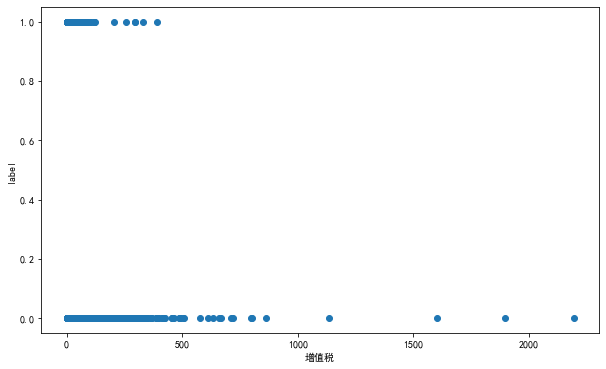

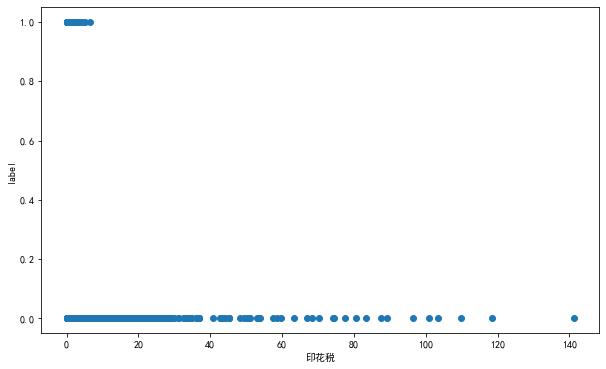

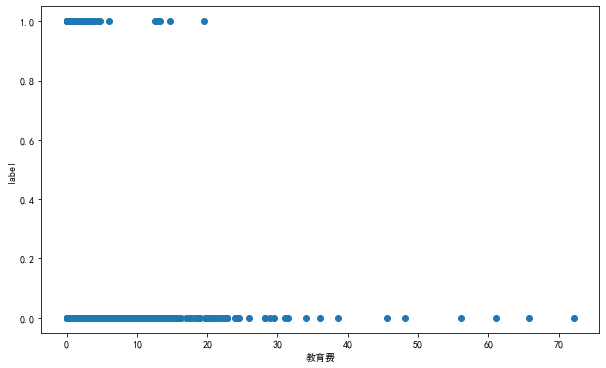

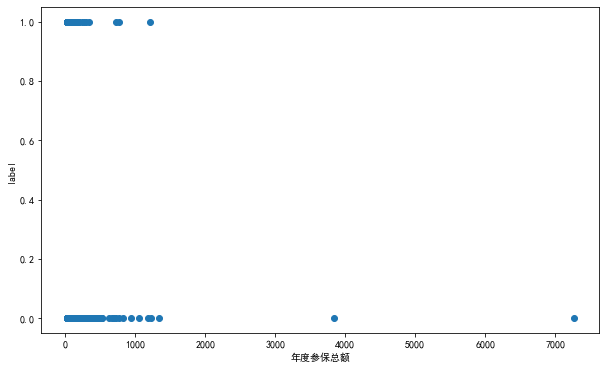

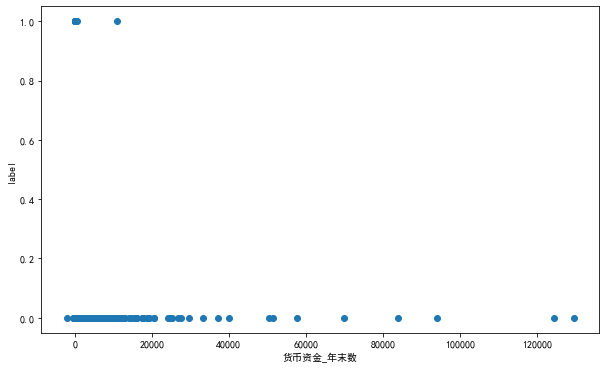

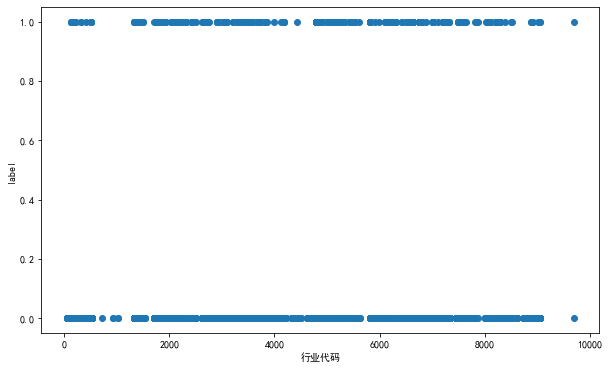

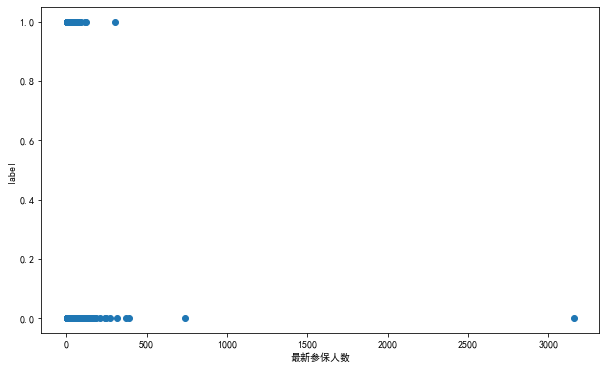

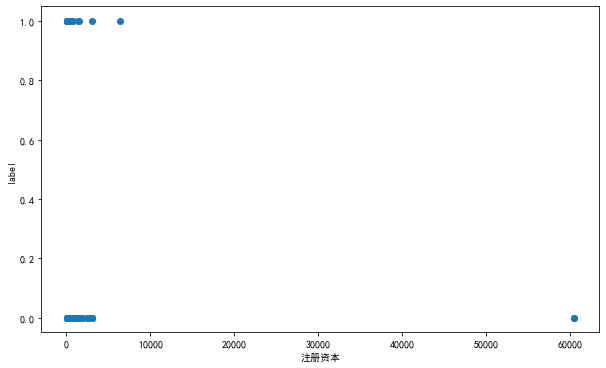

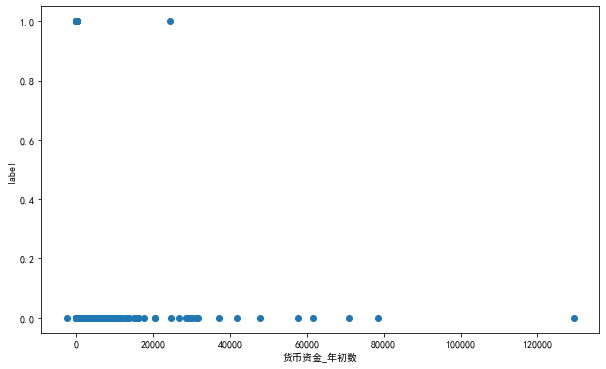

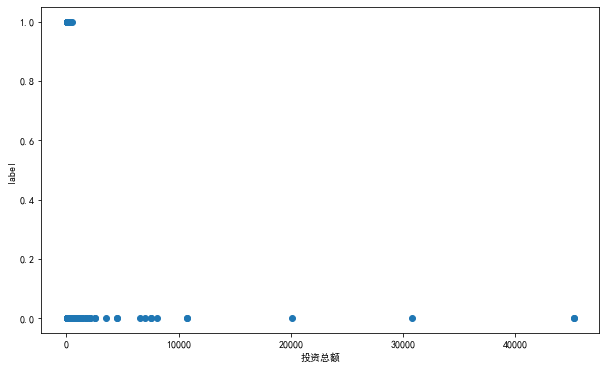

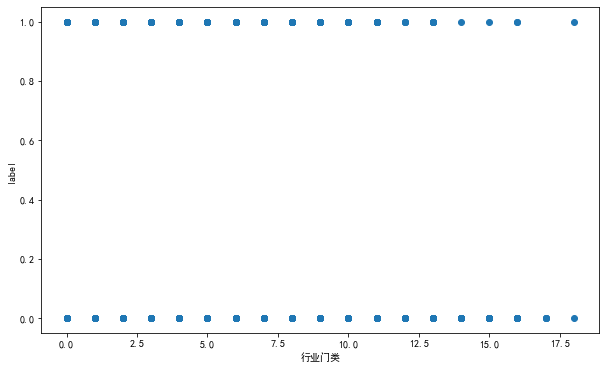

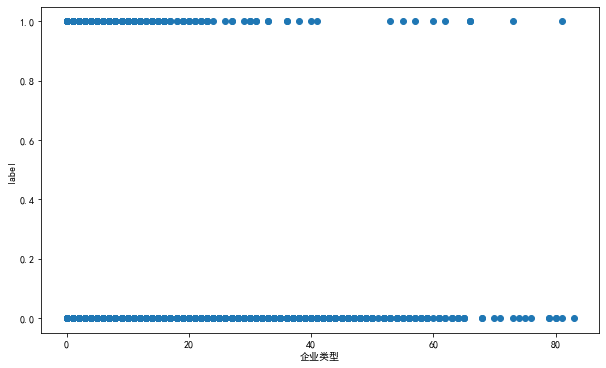

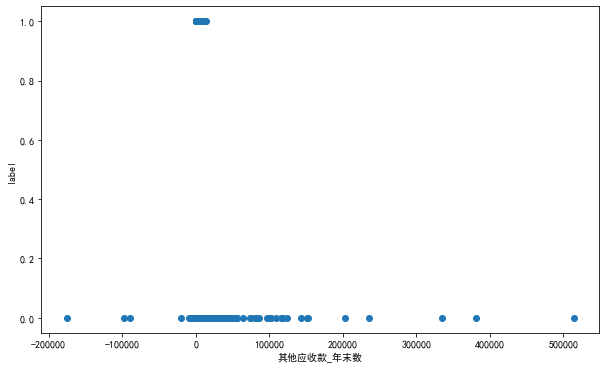

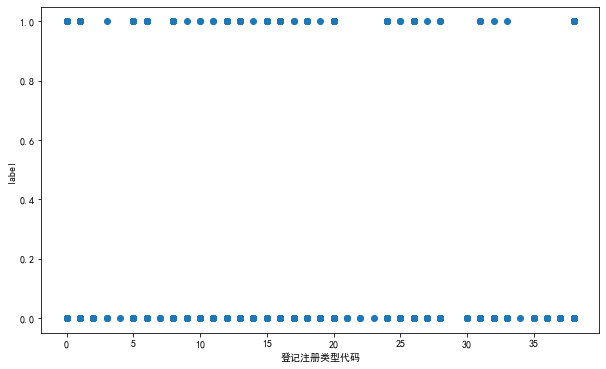

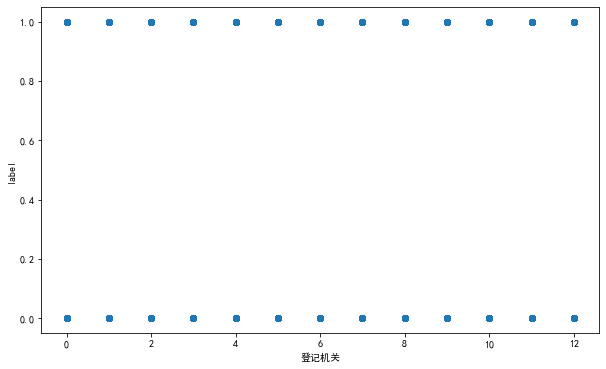

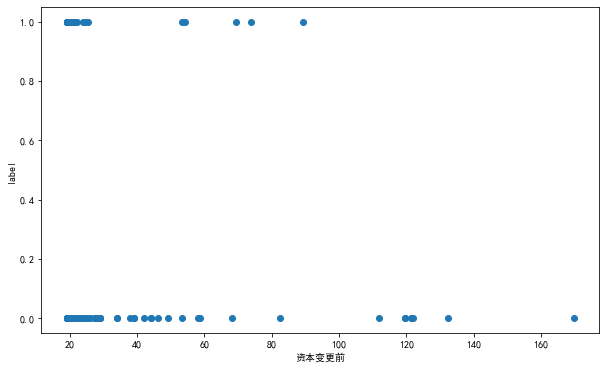

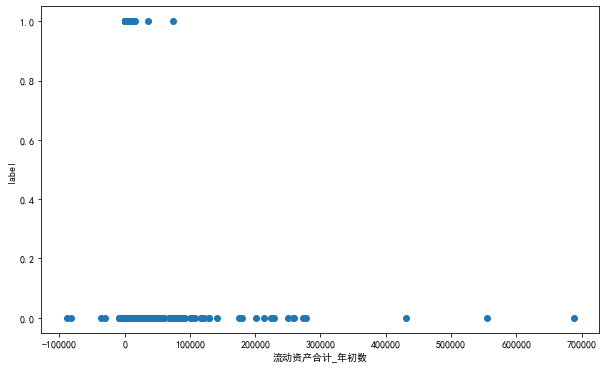

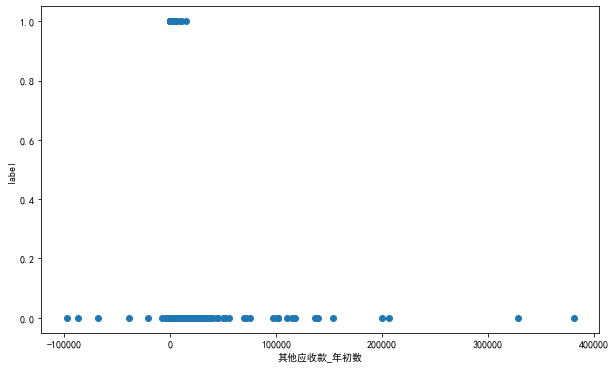

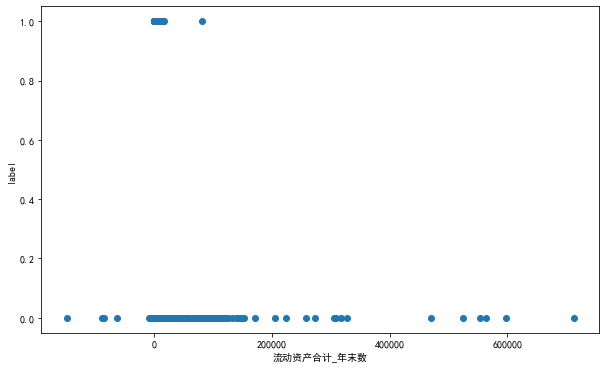

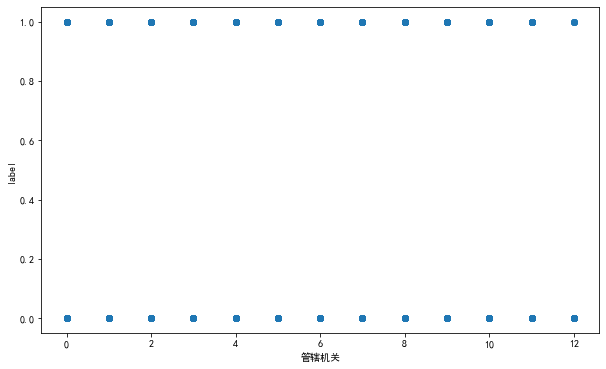

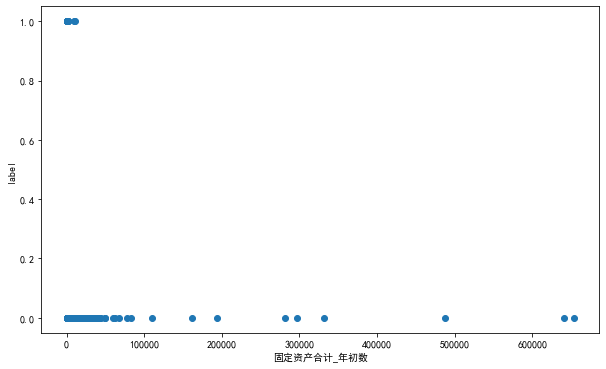

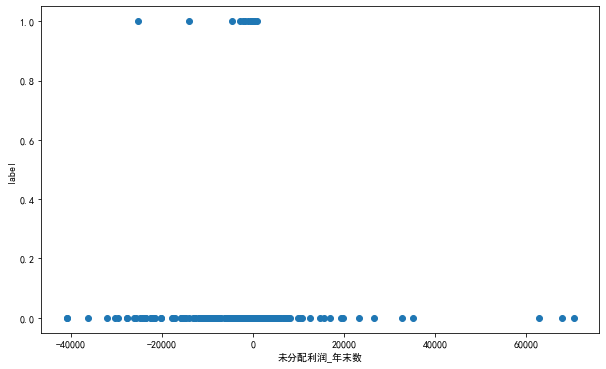

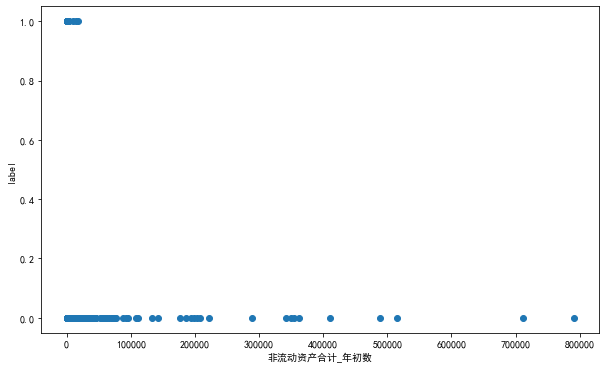

In [19]:
# 观察数据分布-散点图，发现部分数据分布不一致
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
for feat in ['企业所得税','城建税','增值税','印花税','教育费','年度参保总额',
            '货币资金_年末数','行业代码','最新参保人数','注册资本','货币资金_年初数',
            '投资总额','行业门类','企业类型','其他应收款_年末数','登记注册类型代码',
            '登记机关','资本变更前','流动资产合计_年初数','其他应收款_年初数','流动资产合计_年末数',
            '管辖机关','固定资产合计_年初数','未分配利润_年末数','非流动资产合计_年初数']:
    plt.figure(figsize=(10, 6))
    plt.scatter(x=train[feat].value_counts(), y=train.label)
    plt.xlabel(feat)  
    plt.ylabel('label')  

In [11]:
# 统计特征频次分布，发现大量0
for feat in ['企业所得税','城建税','增值税','印花税','教育费','年度参保总额',
            '货币资金_年末数','行业代码','最新参保人数','注册资本','货币资金_年初数',
            '投资总额','行业门类','企业类型','其他应收款_年末数','登记注册类型代码',
            '登记机关','资本变更前','流动资产合计_年初数','其他应收款_年初数','流动资产合计_年末数',
            '管辖机关','固定资产合计_年初数','未分配利润_年末数','非流动资产合计_年初数']:
    print(train[feat].value_counts())

0.000000      1804
192.165077       3
15.066292        3
1.506629         2
0.281423         2
              ... 
26.137688        1
16.526662        1
19.347318        1
5.991972         1
49.247367        1
Name: 企业所得税, Length: 9667, dtype: int64
0.000000     1387
0.020479        3
1.112846        3
26.497785       3
31.994192       3
             ... 
1.813844        1
5.478030        1
3.097842        1
7.023191        1
0.097653        1
Name: 城建税, Length: 12345, dtype: int64
0.000000      1361
0.292549         4
14.492394        3
457.059887       3
6.082372         2
              ... 
80.139194        1
0.176643         1
68.590631        1
28.309836        1
55.509642        1
Name: 增值税, Length: 12324, dtype: int64
0.000000    947
0.001004    246
0.000502     80
0.001256     70
0.001507     53
           ... 
2.194732      1
3.646585      1
0.118612      1
2.248709      1
0.008323      1
Name: 印花税, Length: 11075, dtype: int64
0.000000     2109
0.438824        3
22.852992      

In [23]:
# 输出缺失程度
for feat in ['企业所得税','城建税','增值税','印花税','教育费','年度参保总额',
            '货币资金_年末数','行业代码','最新参保人数','注册资本','货币资金_年初数',
            '投资总额','行业门类','企业类型','其他应收款_年末数','登记注册类型代码',
            '登记机关','资本变更前','流动资产合计_年初数','其他应收款_年初数','流动资产合计_年末数',
            '管辖机关','固定资产合计_年初数','未分配利润_年末数','非流动资产合计_年初数']:
    print(train[feat].isna().sum())

2876
591
652
1326
0
4596
8343
775
4596
777
8343
11483
770
768
8343
287
768
13608
8343
8343
8343
769
8343
8343
8343


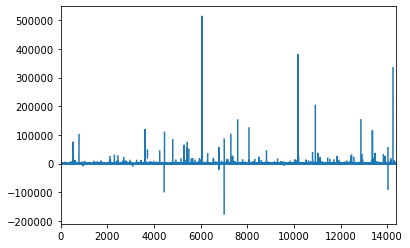

In [32]:
# 异常数据观察 出现负值，测试集中不存在
train['其他应收款_年末数'].plot()

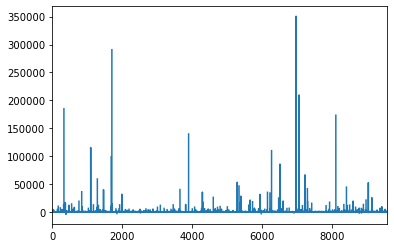

In [33]:
test['其他应收款_年末数'].plot()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


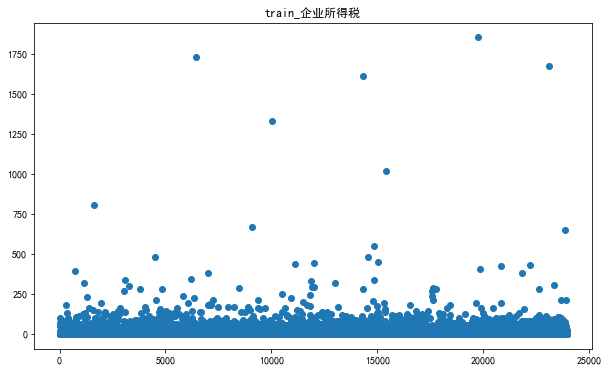

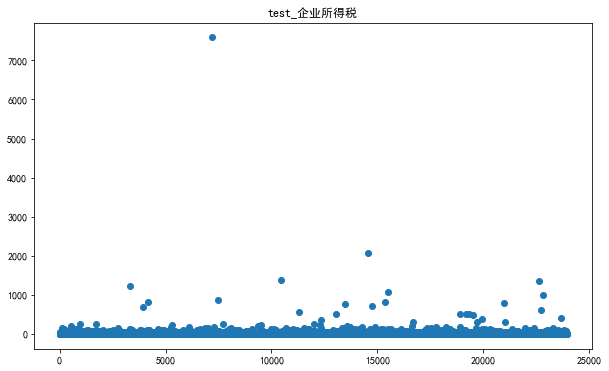

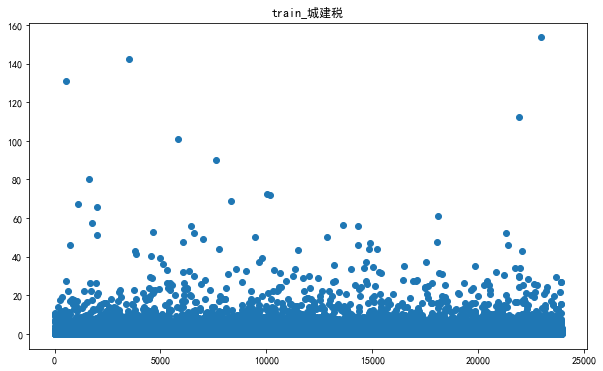

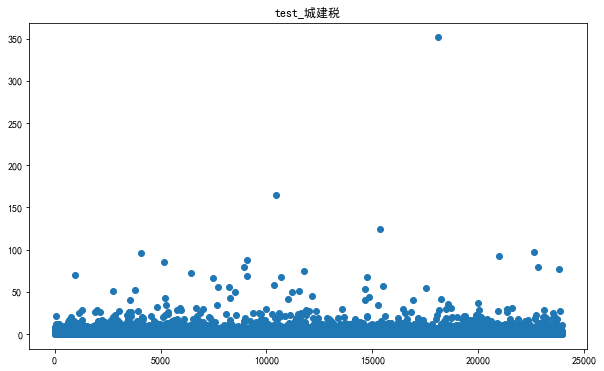

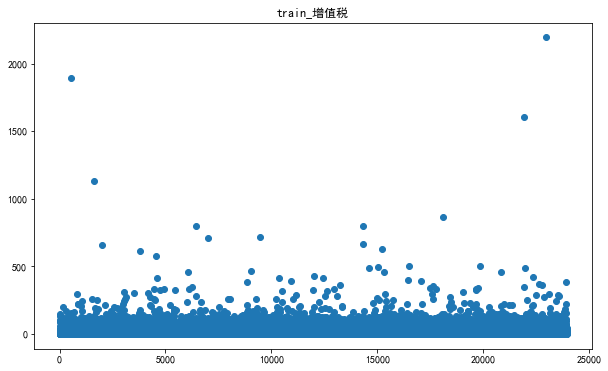

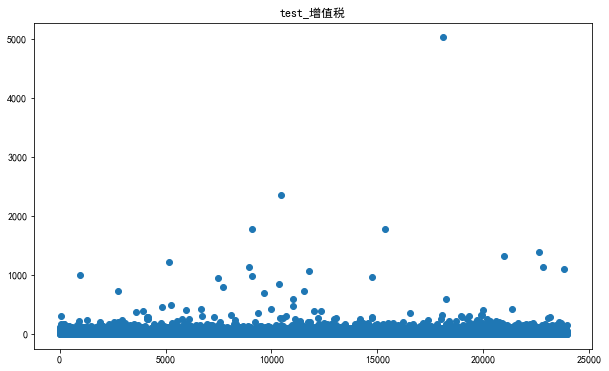

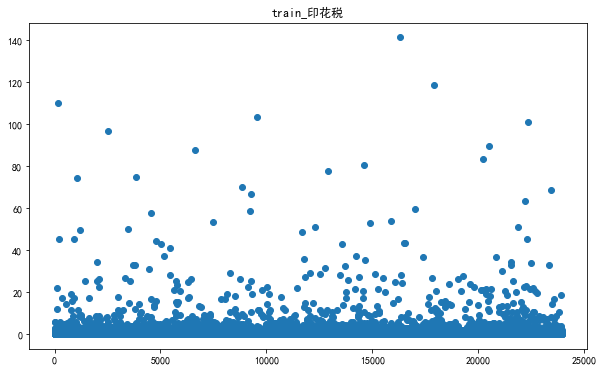

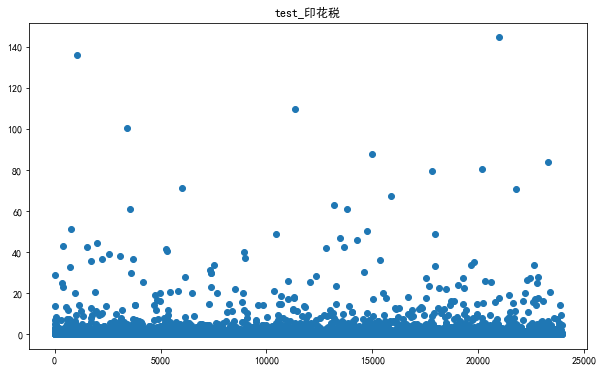

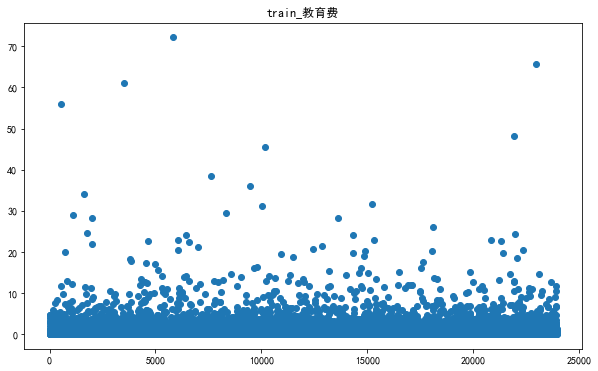

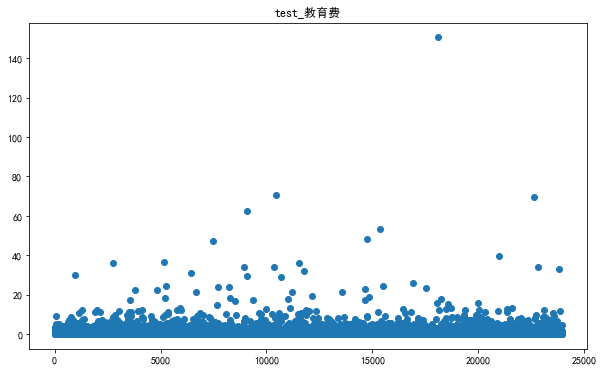

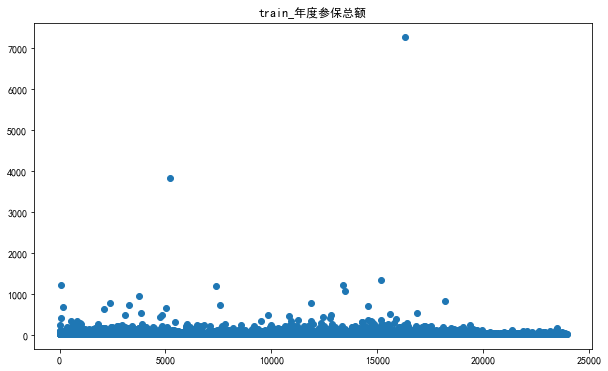

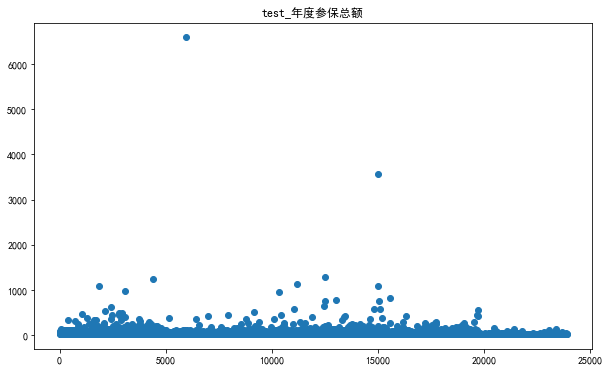

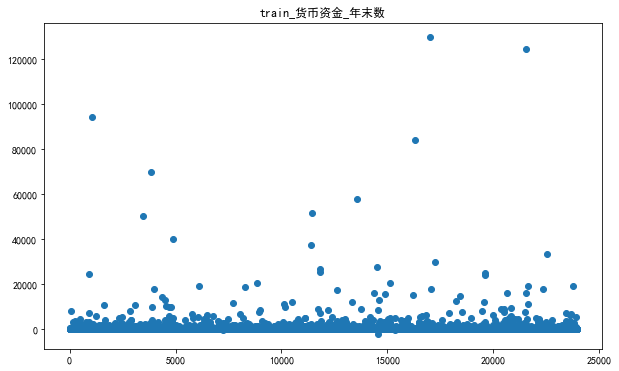

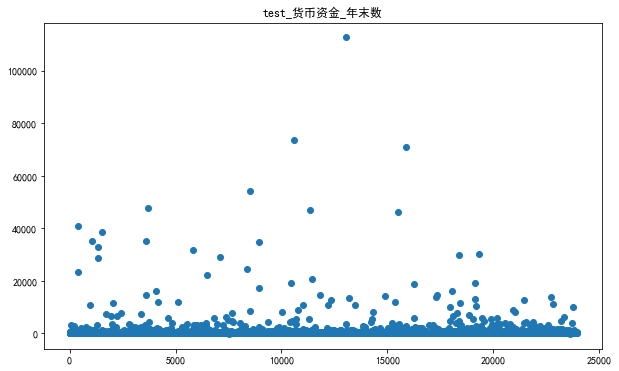

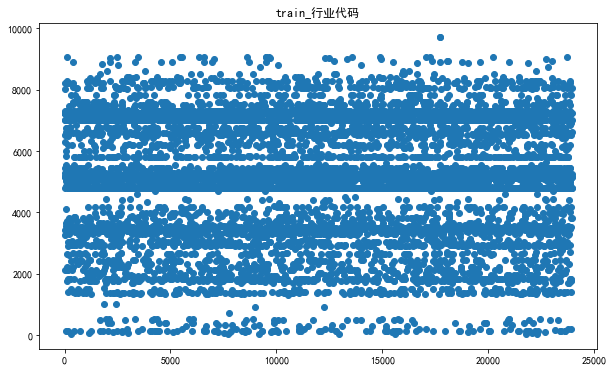

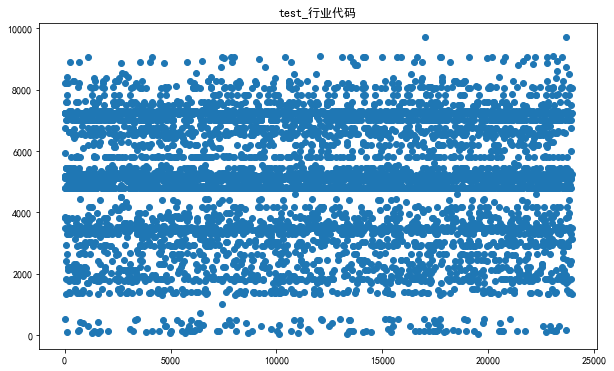

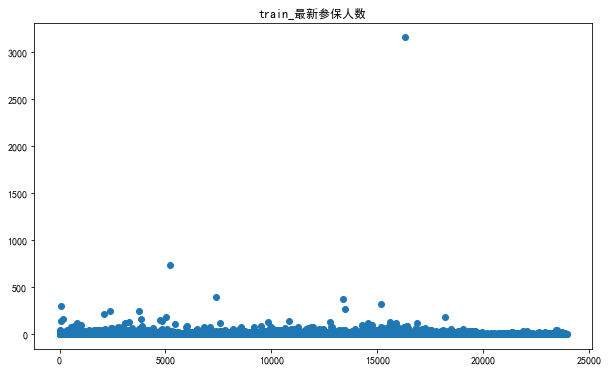

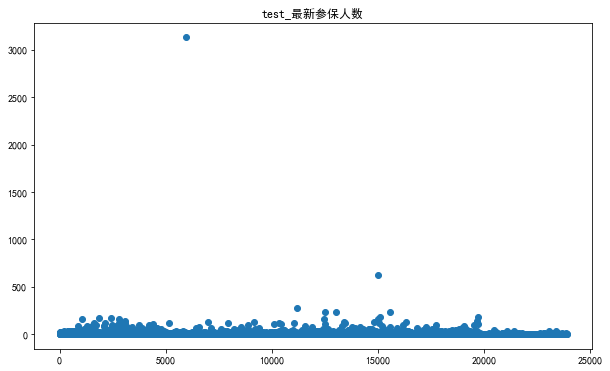

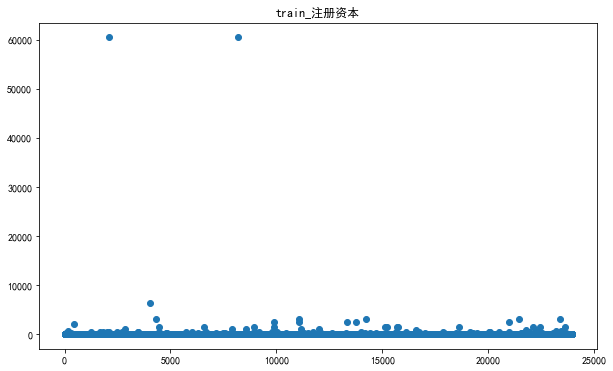

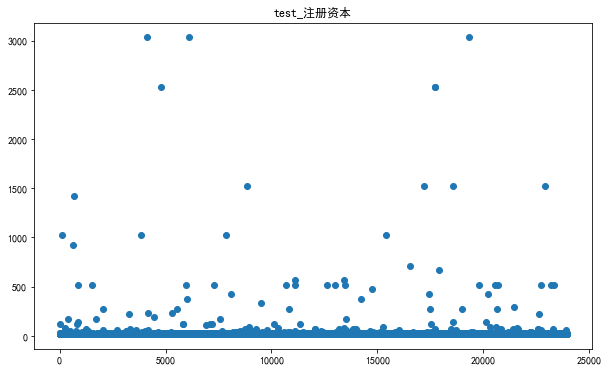

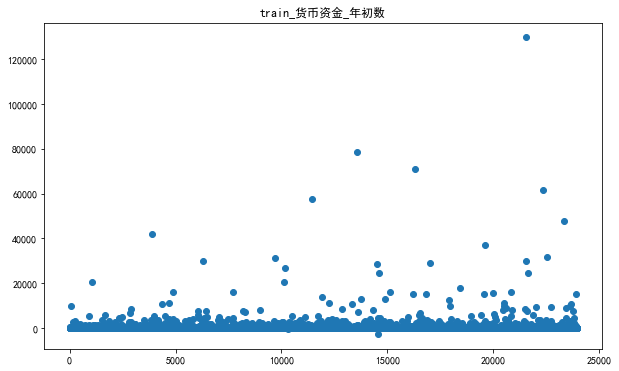

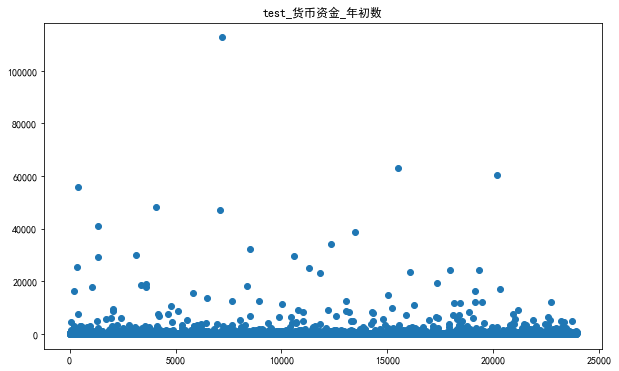

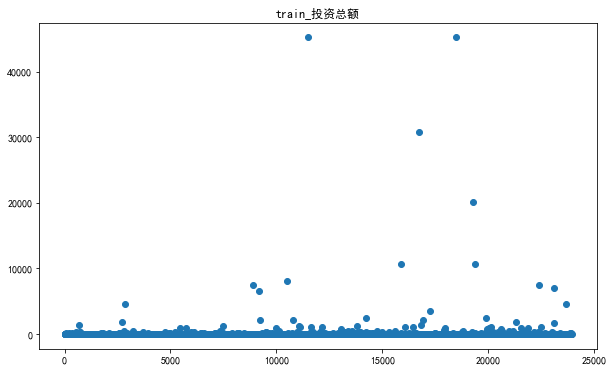

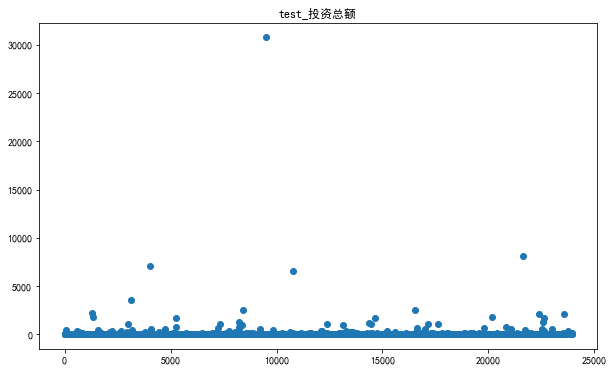

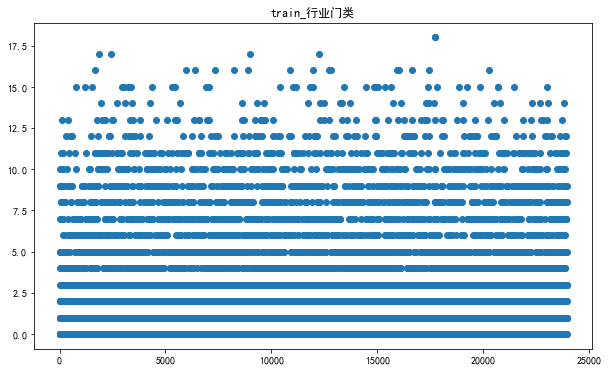

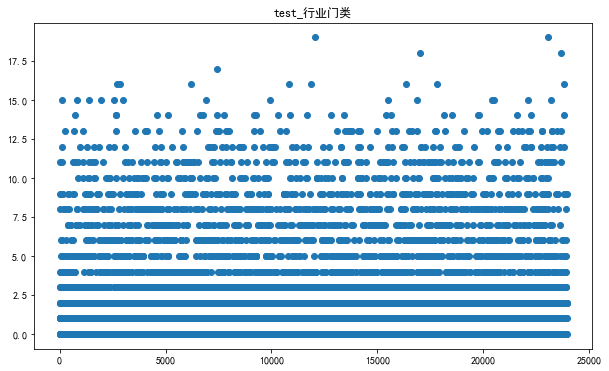

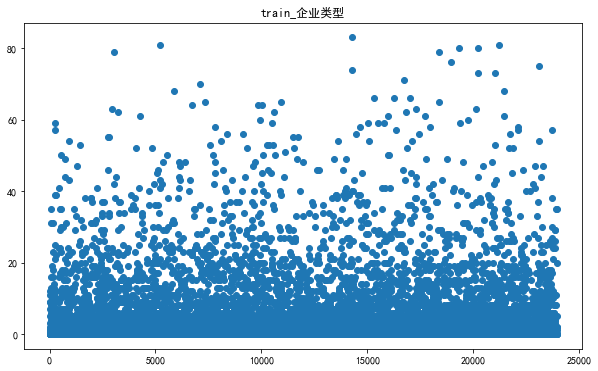

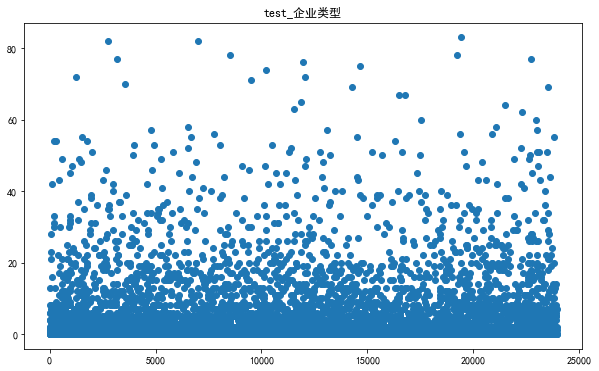

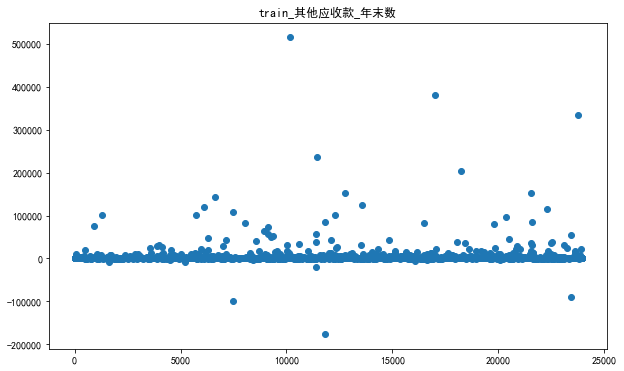

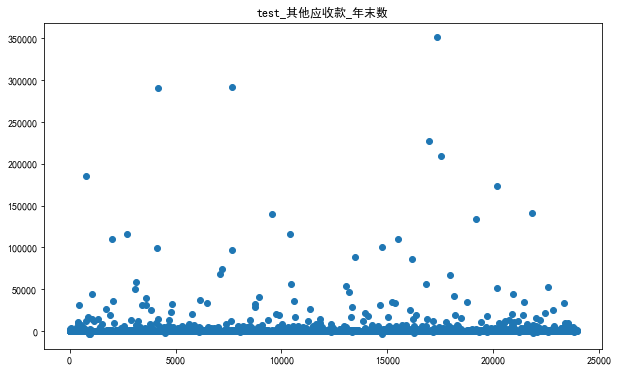

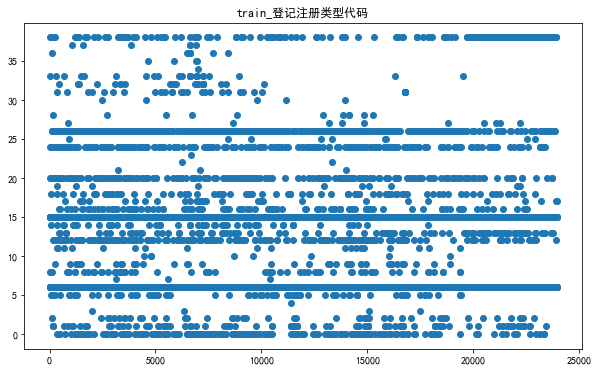

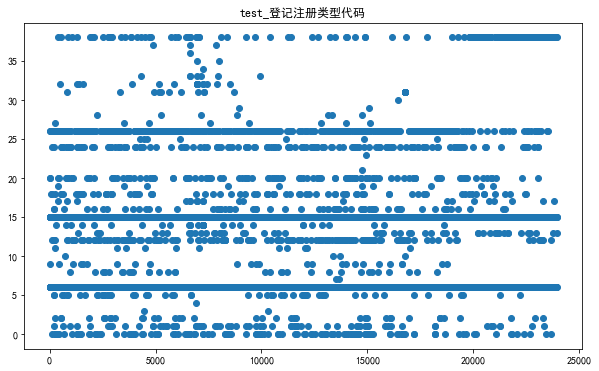

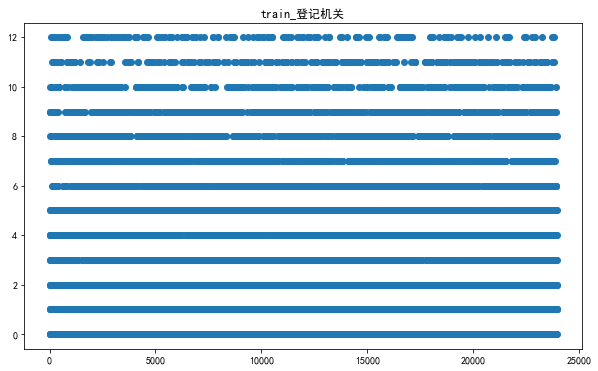

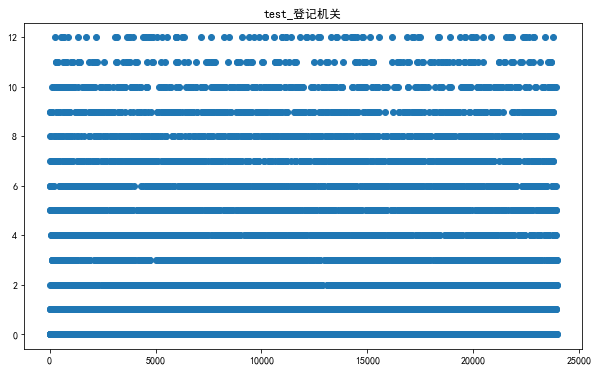

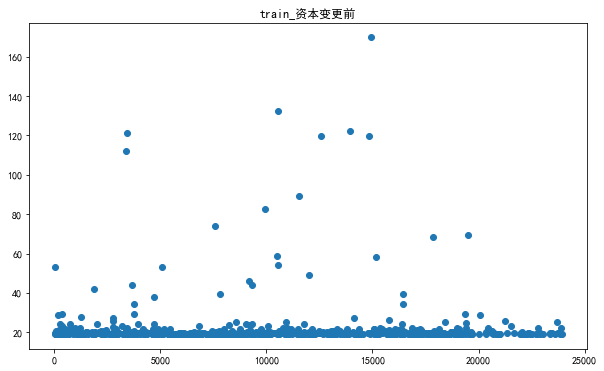

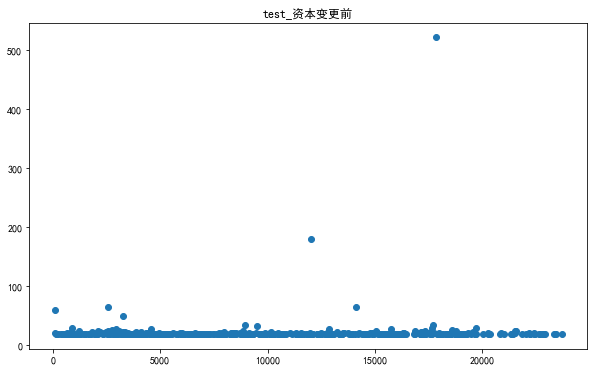

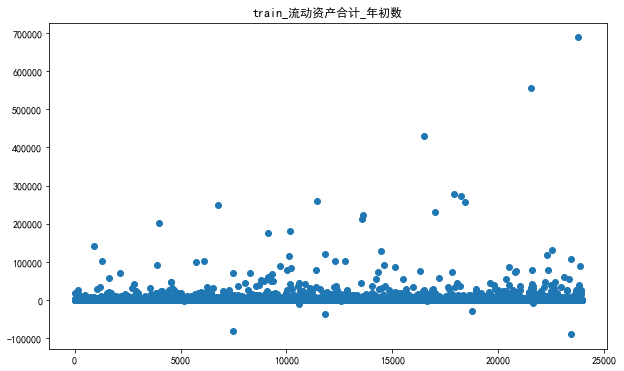

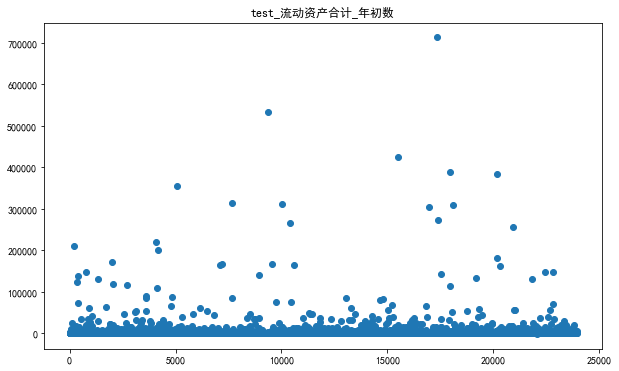

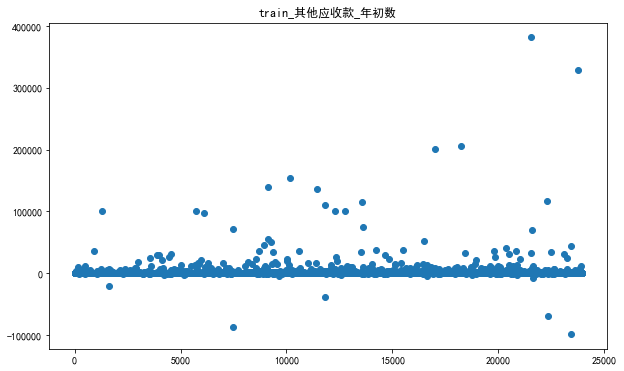

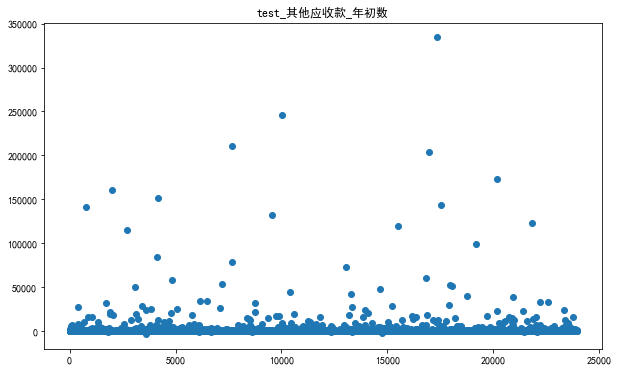

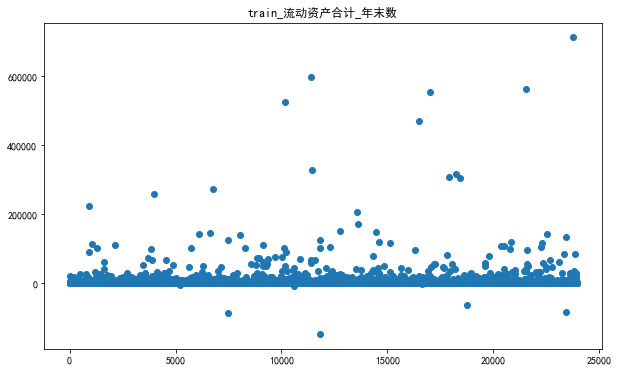

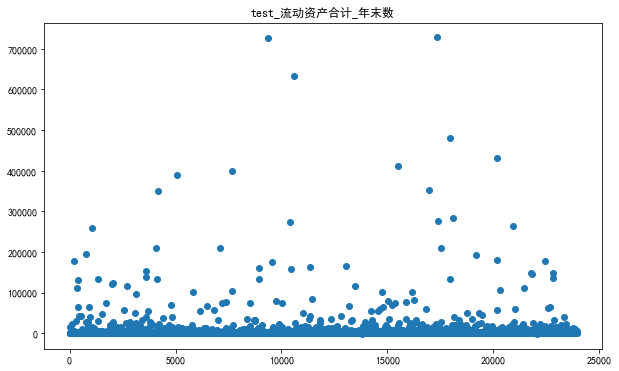

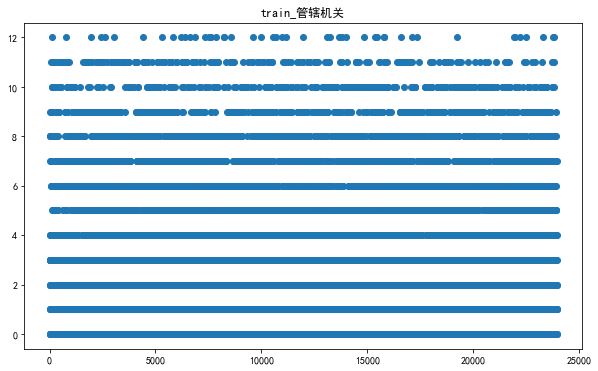

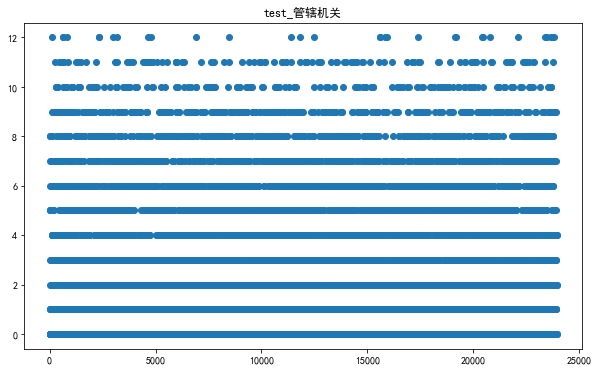

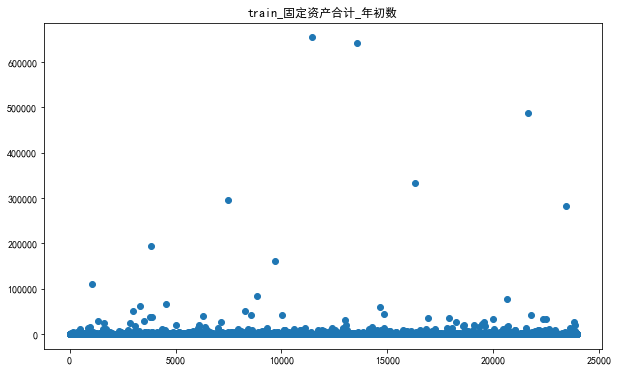

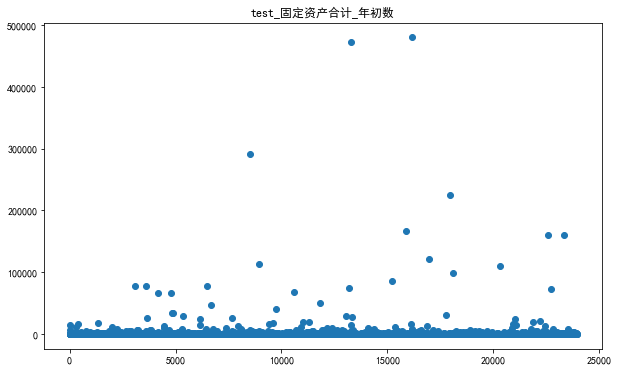

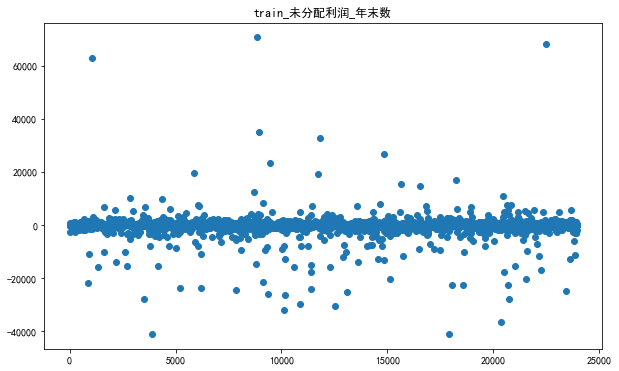

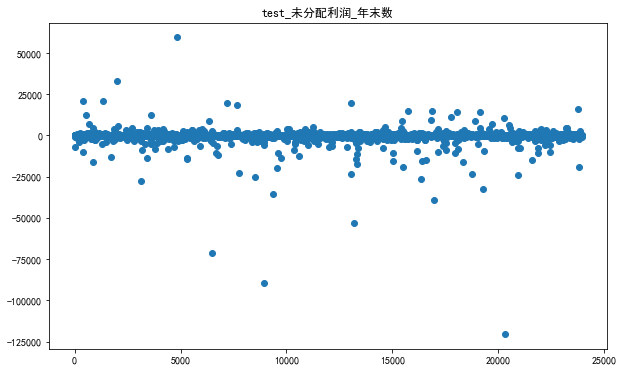

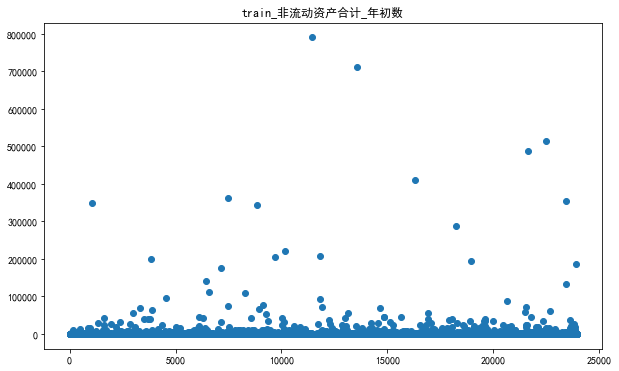

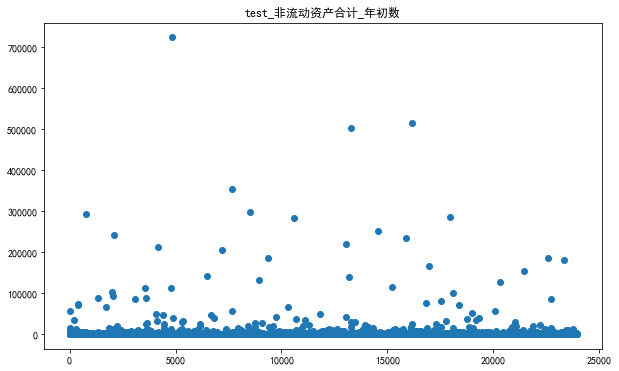

In [42]:
# 对比观察训练集 测试集分布
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
for feat in ['企业所得税','城建税','增值税','印花税','教育费','年度参保总额',
            '货币资金_年末数','行业代码','最新参保人数','注册资本','货币资金_年初数',
            '投资总额','行业门类','企业类型','其他应收款_年末数','登记注册类型代码',
            '登记机关','资本变更前','流动资产合计_年初数','其他应收款_年初数','流动资产合计_年末数',
            '管辖机关','固定资产合计_年初数','未分配利润_年末数','非流动资产合计_年初数']:
    plt.figure(figsize=(10, 6))
    plt.scatter(x=train.ID, y=train[feat])  
    plt.title('train_'+feat)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x=test.ID, y=test[feat])  
    plt.title('test_'+feat)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


D:\anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

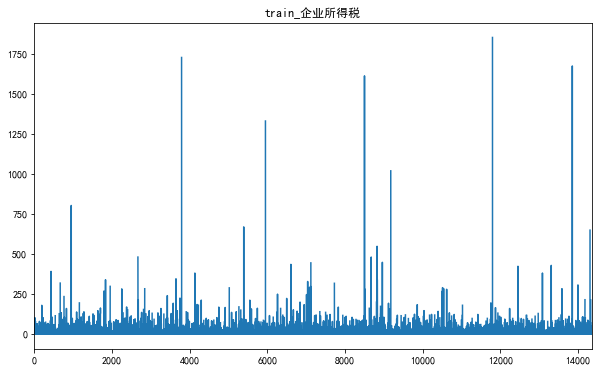

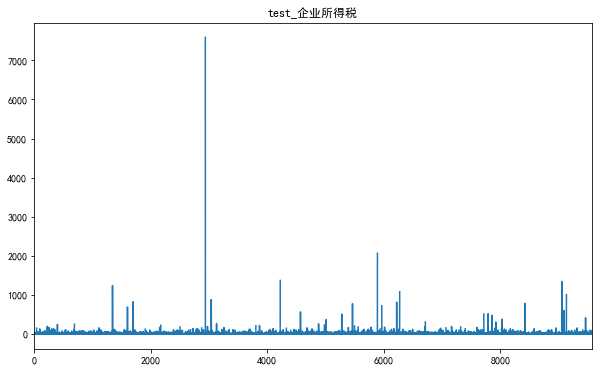

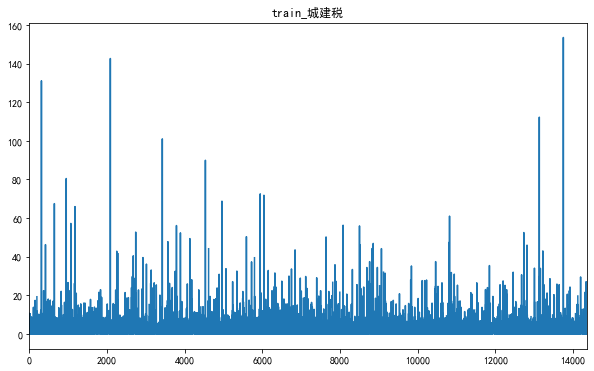

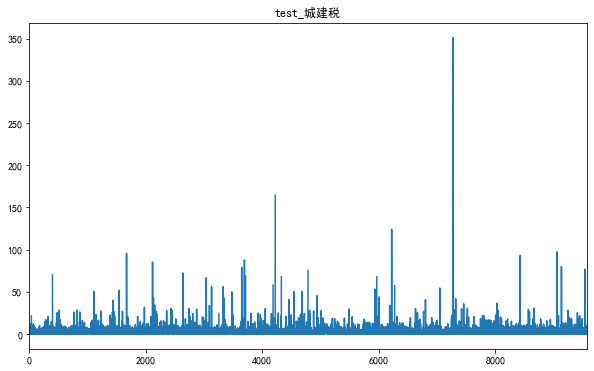

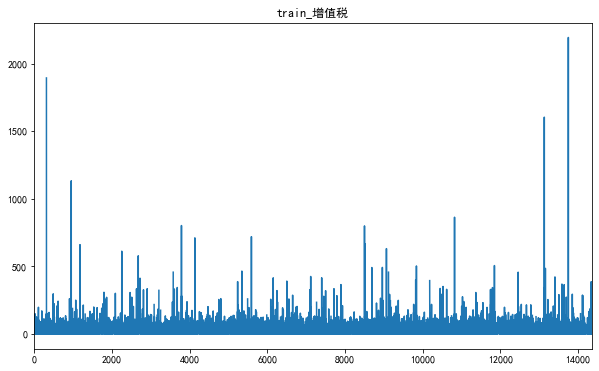

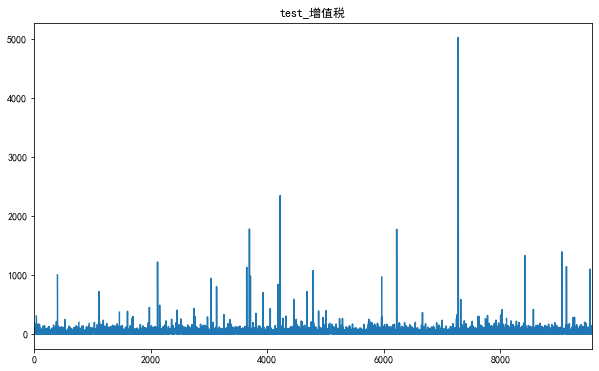

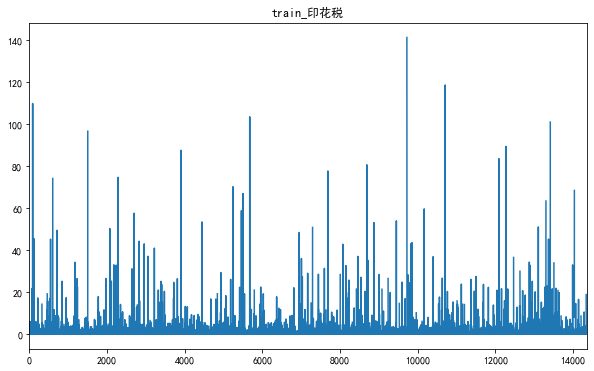

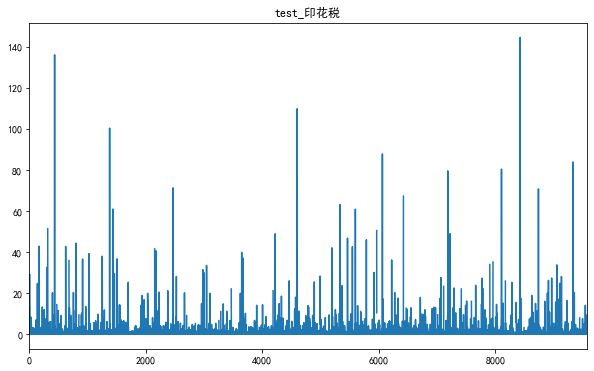

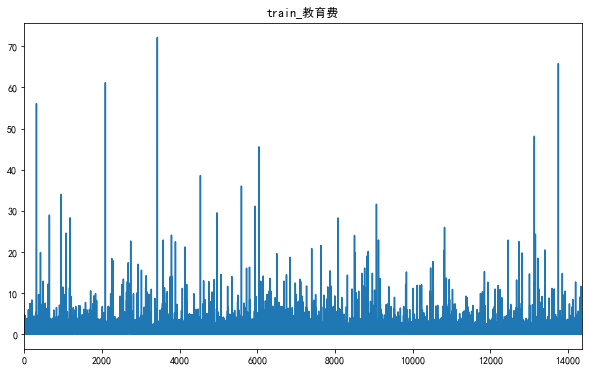

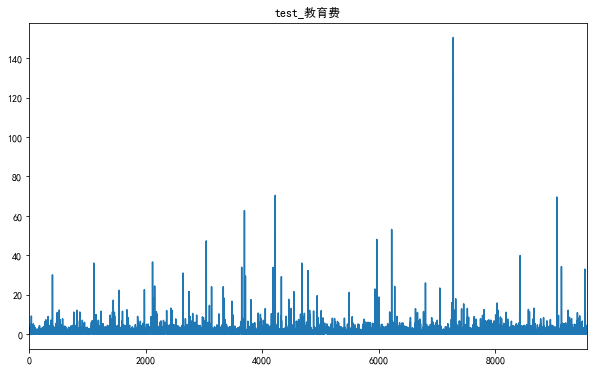

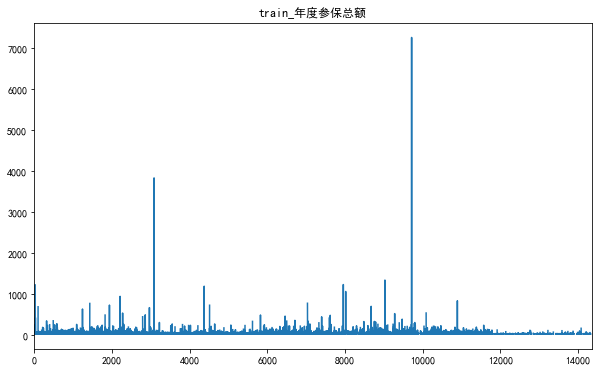

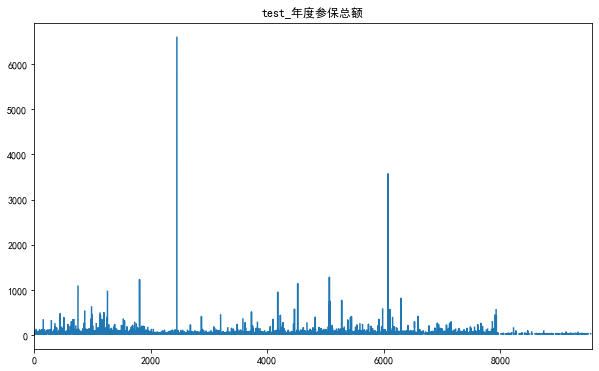

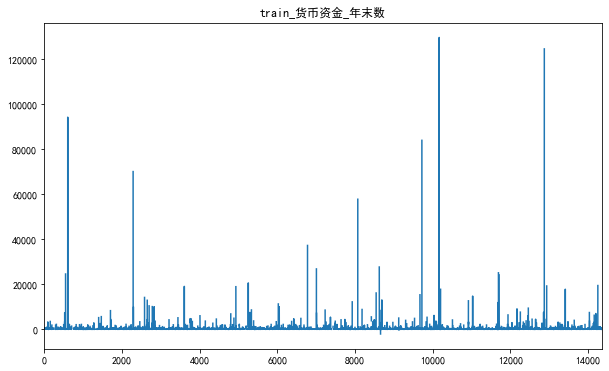

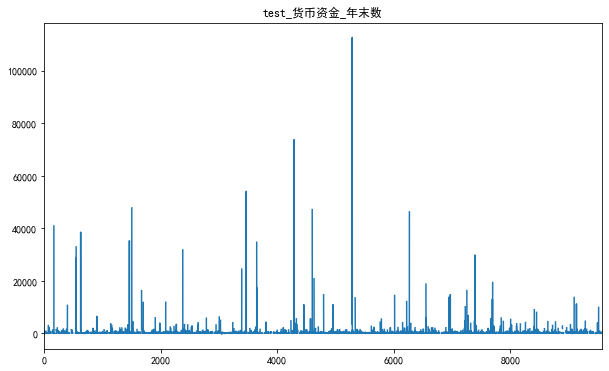

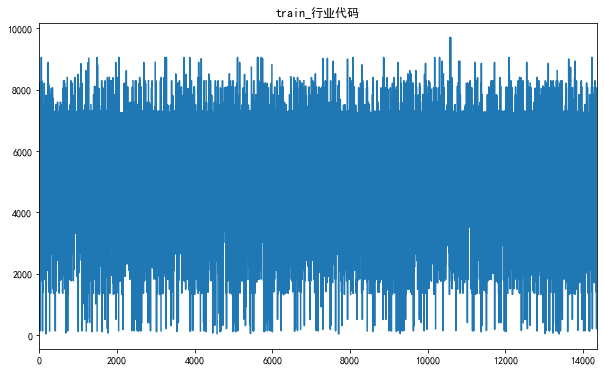

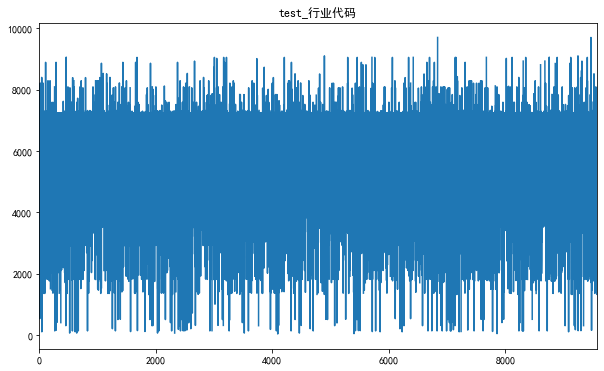

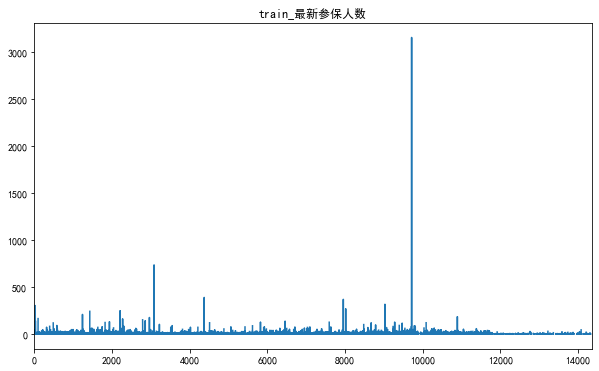

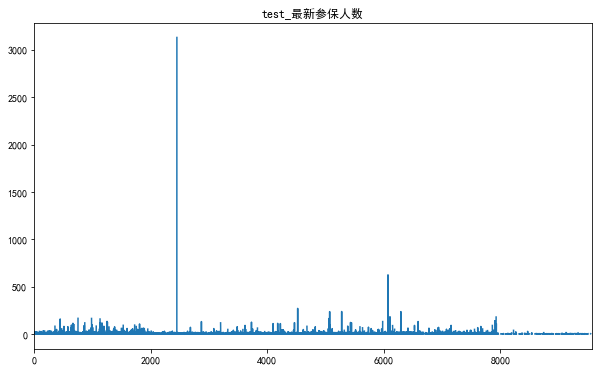

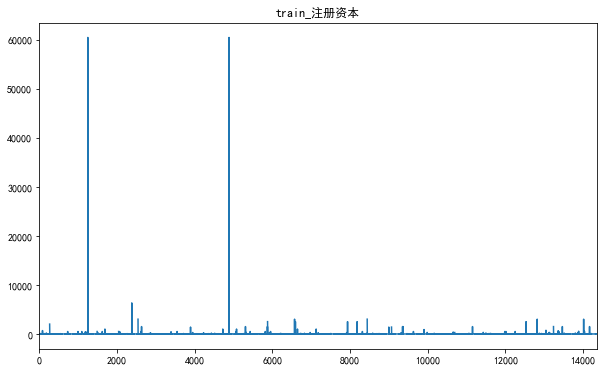

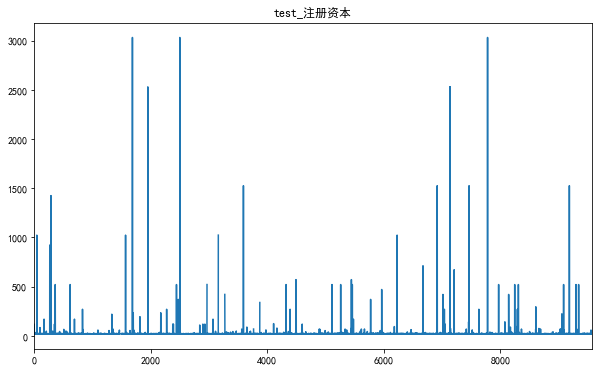

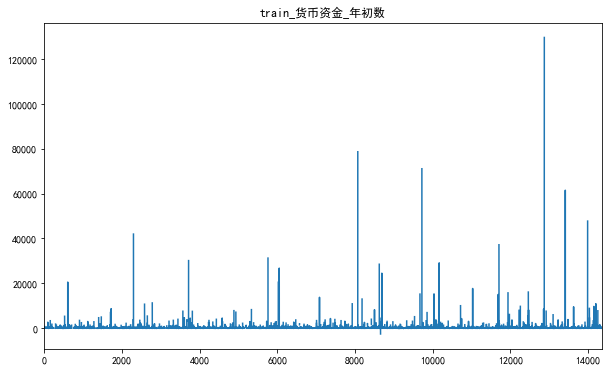

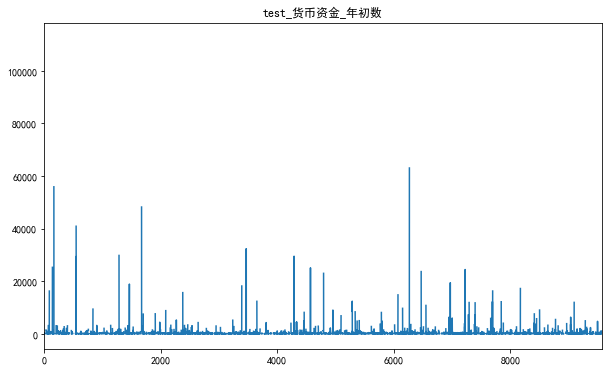

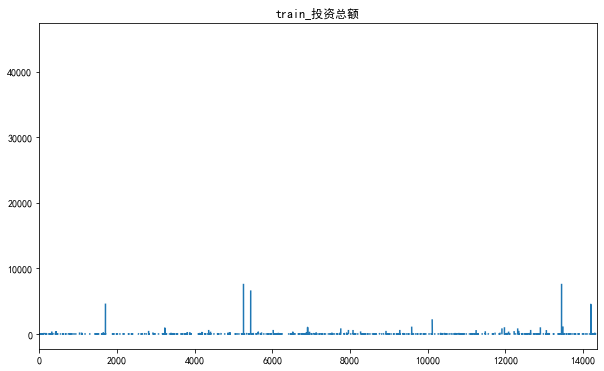

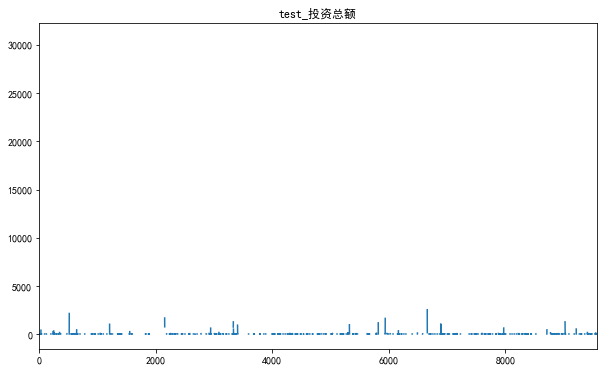

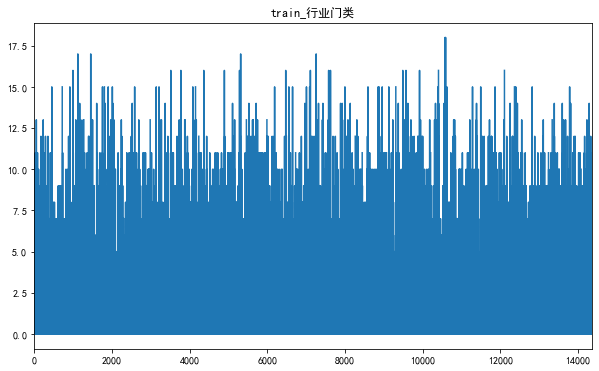

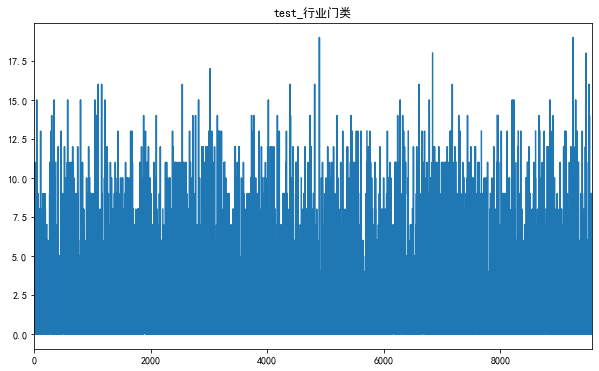

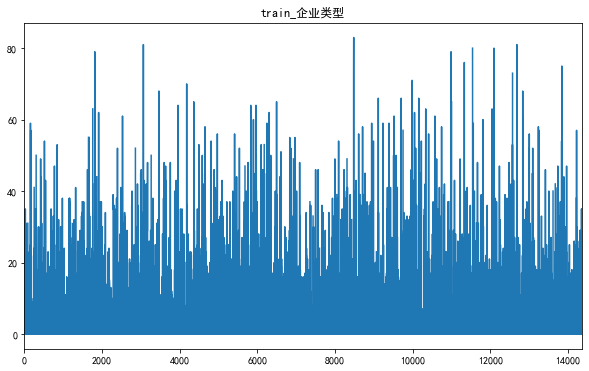

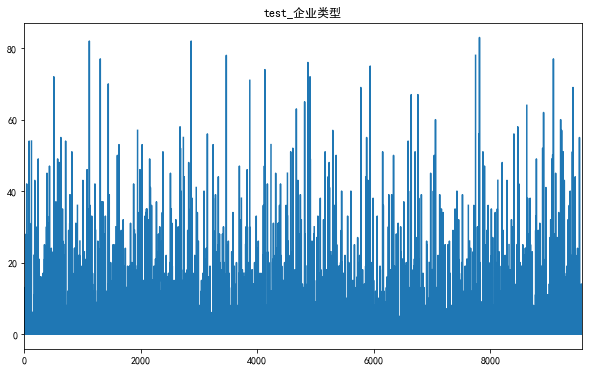

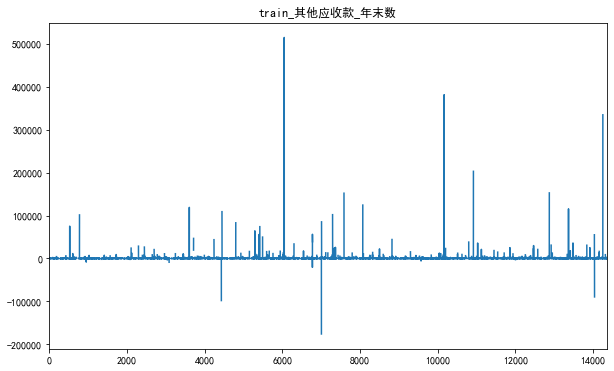

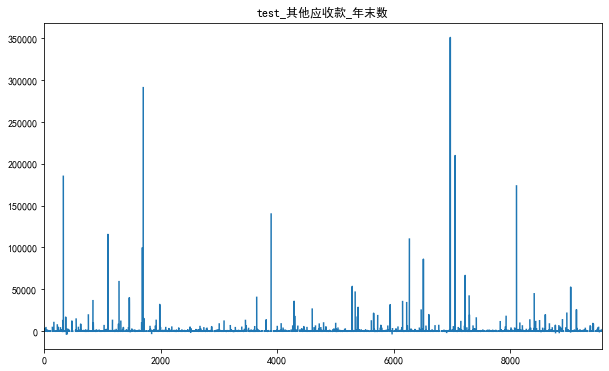

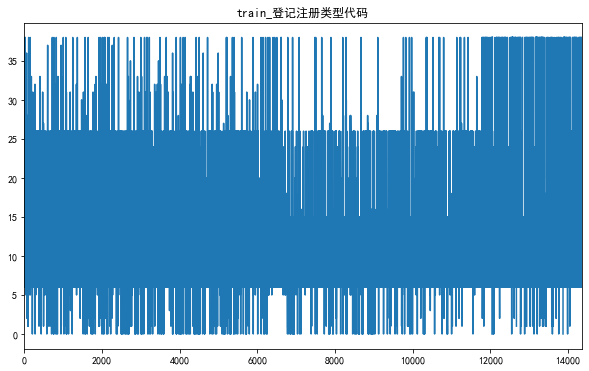

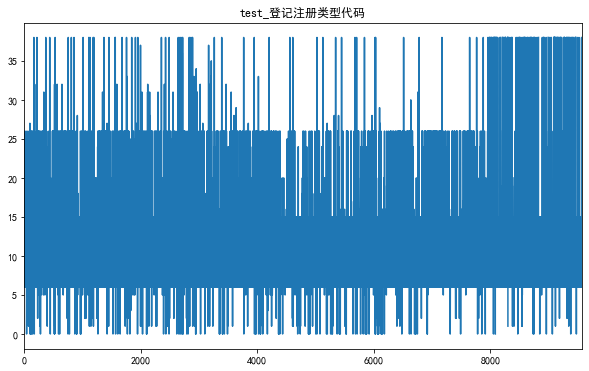

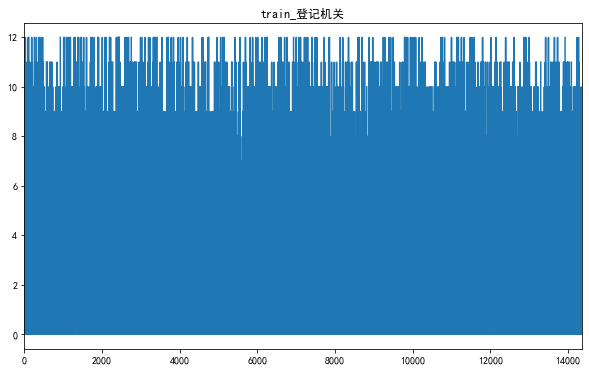

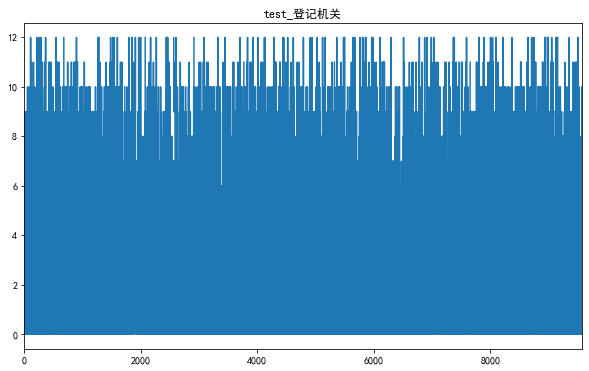

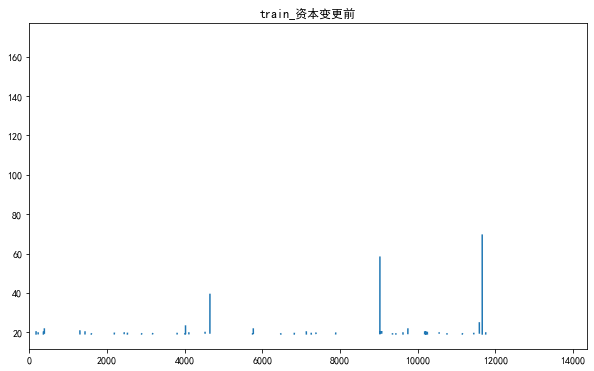

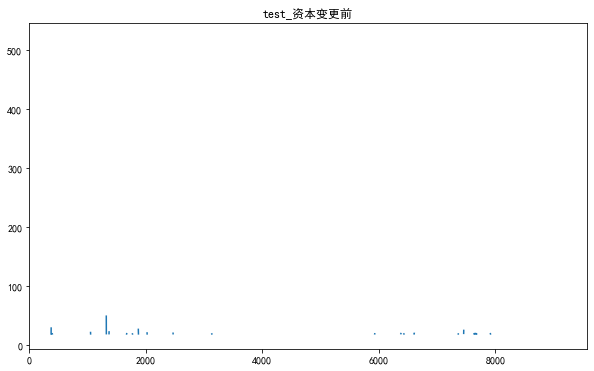

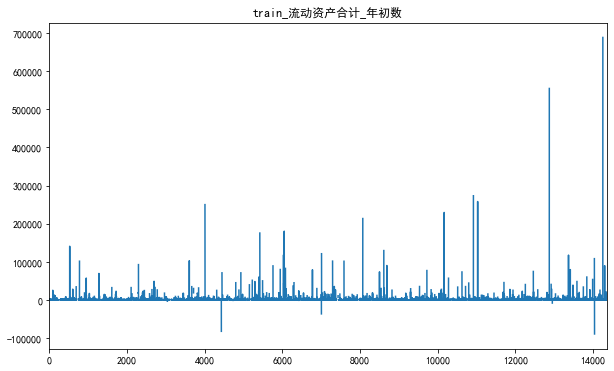

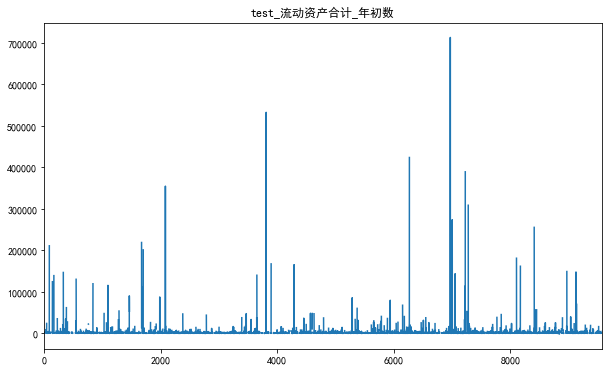

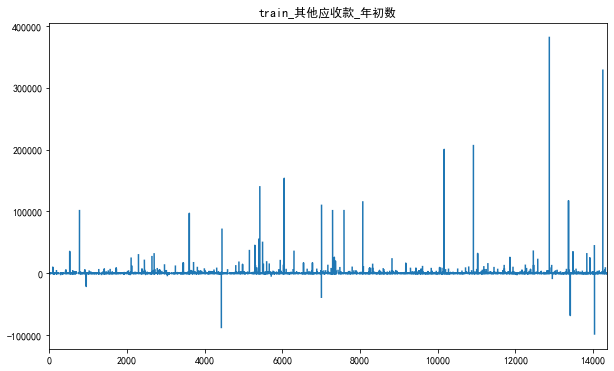

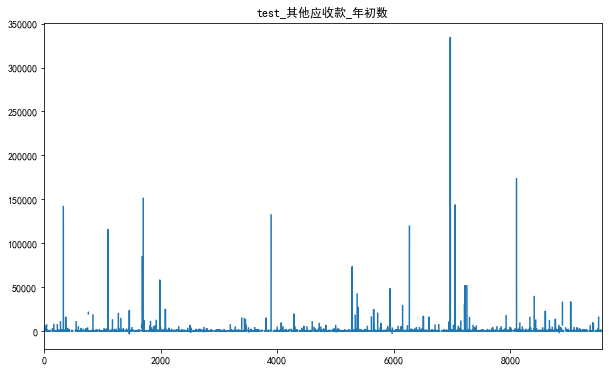

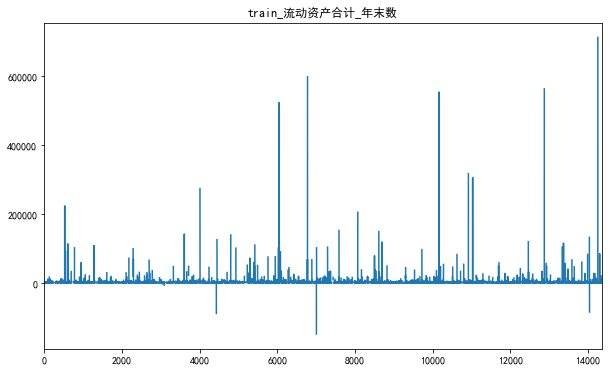

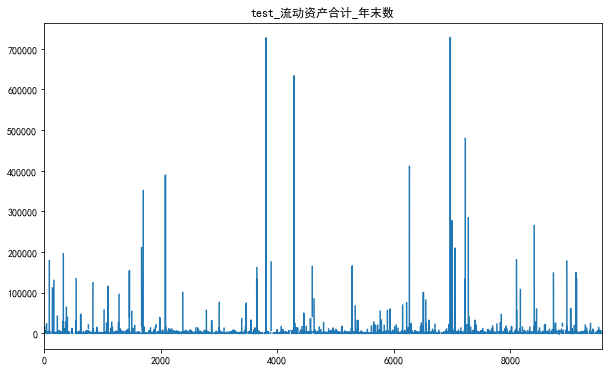

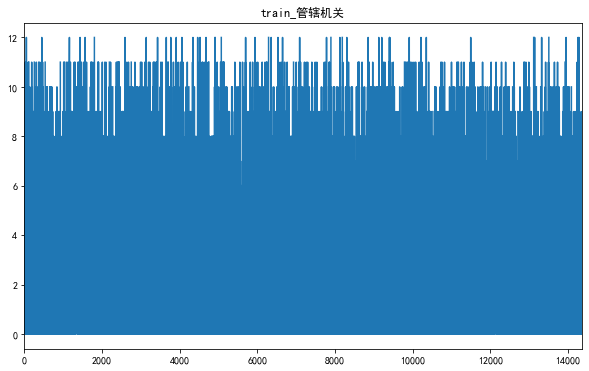

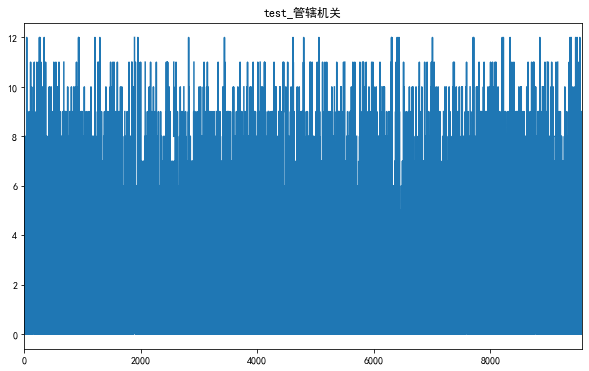

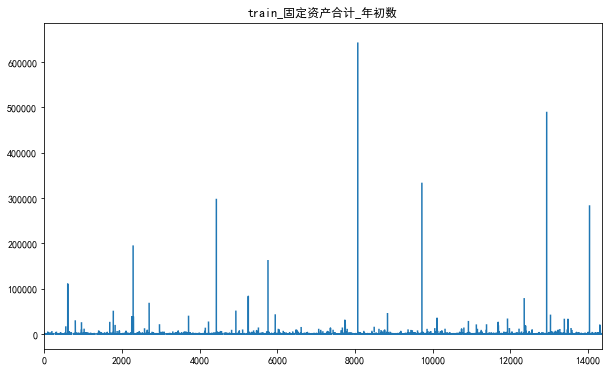

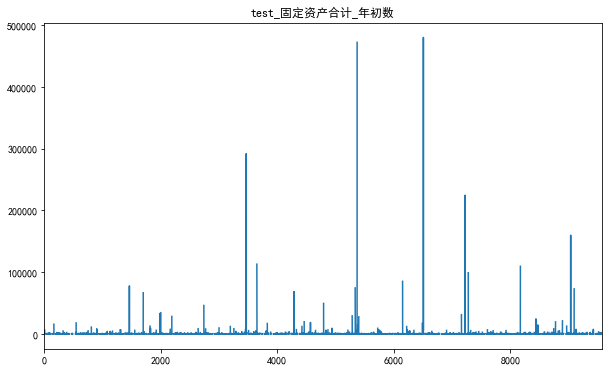

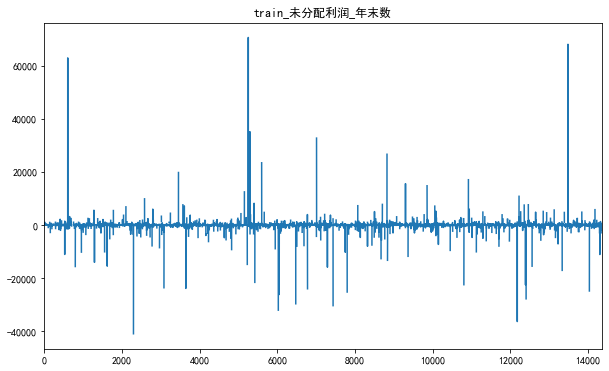

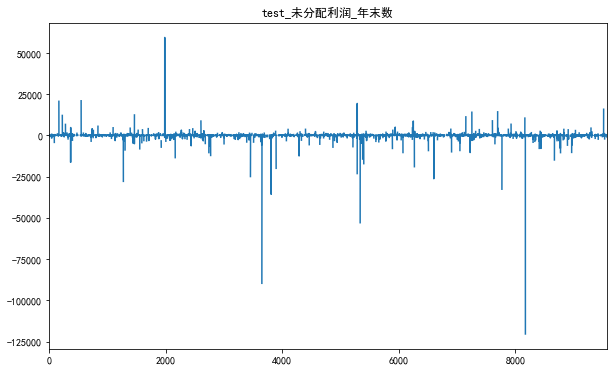

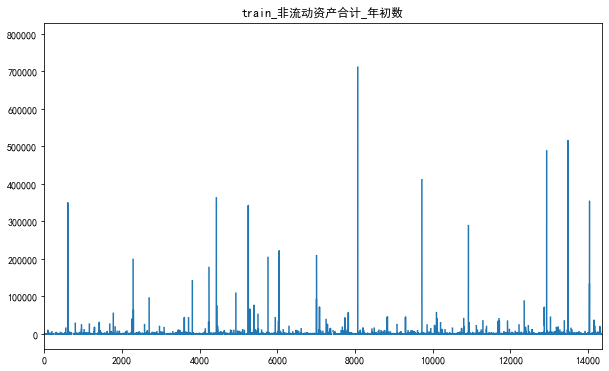

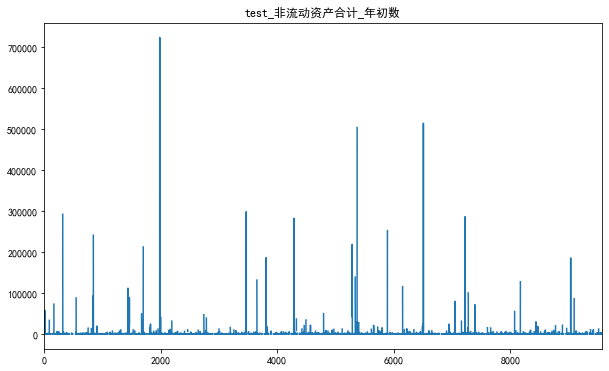

In [32]:
# 对比训练集 测试集分布，发现离群点
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
for feat in ['企业所得税','城建税','增值税','印花税','教育费','年度参保总额',
            '货币资金_年末数','行业代码','最新参保人数','注册资本','货币资金_年初数',
            '投资总额','行业门类','企业类型','其他应收款_年末数','登记注册类型代码',
            '登记机关','资本变更前','流动资产合计_年初数','其他应收款_年初数','流动资产合计_年末数',
            '管辖机关','固定资产合计_年初数','未分配利润_年末数','非流动资产合计_年初数']:
    plt.figure(figsize=(10, 6))
    train[feat].plot()
    plt.title('train_'+feat)
    
    plt.figure(figsize=(10, 6))
    test[feat].plot()
    plt.title('test_'+feat)

In [46]:
test.loc[test['增值税']>5000]['企业所得税']

7278   NaN
Name: 企业所得税, dtype: float64

In [50]:
test[test['企业所得税']>7000]#[['企业所得税','城建税','增值税','印花税','教育费']]

,ID,企业类型,经营期限至,登记机关,企业状态,邮政编码,投资总额,注册资本,核准日期,行业代码,...,处罚类型_0,处罚类型_1,处罚类型_2,处罚类型_3,罚款金额_sum,罚款金额_count,罚款金额_max,罚款金额_min,最新参保人数,年度参保总额
2937,7207,1.0,NaN,0.0,1.0,NaN,NaN,19.112511,42:06.0,7249.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.248572,24.339976


In [49]:
test[test['城建税']>300][['企业所得税','城建税','增值税','印花税','教育费']]

,企业所得税,城建税,增值税,印花税,教育费
7278,NaN,351.372629,5022.118793,12.87492,150.58827


In [51]:
# 观察训练集中异常数据
train[train['流动资产合计_年初数']<0][['流动资产合计_年初数', '流动资产合计_年末数','其他应收款_年初数',
                             '其他应收款_年末数']]

,流动资产合计_年初数,流动资产合计_年末数,其他应收款_年初数,其他应收款_年末数
320,-21.157908,-14.865382,0.000000,0.000000
607,-364.802706,70.132799,-1139.753189,-733.955894
1347,-438.203783,-665.990685,-1637.357226,-1847.937842
1752,-10.040679,22.167025,0.000000,0.000000
1888,-8.733317,196.128496,0.000000,189.081961
2227,-43.064096,446.737926,16.389399,0.000000
2674,-159.782622,-398.884250,-754.432802,-2419.303462
3042,-3267.182592,-2948.393721,-3388.044758,-2980.869276
3065,-198.768670,-20.328894,-310.480375,-88.783688
4251,-318.561097,25.342255,-328.925680,0.000000


In [68]:
train = pd.read_csv('./data/train_stage2_update_20200320.csv')
test = pd.read_csv('./data/test_stage2_update_20200320.csv')

# 预处理
for feat in ['企业所得税','城建税','增值税','印花税','教育费', '货币资金_年末数',
              '货币资金_年初数', '其他应收款_年末数', '流动资产合计_年初数','其他应收款_年初数',
              '流动资产合计_年末数', '固定资产合计_年初数', '未分配利润_年末数', '未分配利润_年末数',
              '非流动资产合计_年初数']:
    train.loc[train[feat]==0, feat] = None
    test.loc[test[feat]==0, feat] = None
    

train.loc[train['注册资本']>10000, '注册资本'] = None
train.loc[train['其他应收款_年末数']>400000, '其他应收款_年末数'] = None
train.loc[train['其他应收款_年末数']>400000, '其他应收款_年末数'] = None
train.loc[train['流动资产合计_年末数']<0, '流动资产合计_年末数'] = None
train.loc[train['其他应收款_年初数']<0, '其他应收款_年初数'] = None
train.loc[train['流动资产合计_年初数']<0, '流动资产合计_年初数'] = None
train.loc[train['其他应收款_年末数']<0, '其他应收款_年末数'] = None

test.loc[test['企业所得税']>7000, '企业所得税'] = None
test.loc[test['城建税']>300, '城建税'] = None
test.loc[test['增值税']>5000, '增值税'] = None
test.loc[test['教育费']>140, '教育费'] = None

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [75]:
train = train[['企业所得税','城建税','增值税','印花税','教育费', '货币资金_年末数',
              '货币资金_年初数', '其他应收款_年末数', '流动资产合计_年初数','其他应收款_年初数',
              '流动资产合计_年末数', '固定资产合计_年初数', '未分配利润_年末数', '未分配利润_年末数',
              '非流动资产合计_年初数']]

In [76]:
train.isna().sum()/train.shape[0]

企业所得税          0.325769
城建税            0.137686
增值税            0.140123
印花税            0.158221
教育费            0.146805
货币资金_年末数       0.590213
货币资金_年初数       0.601977
其他应收款_年末数      0.677433
流动资产合计_年初数     0.602255
其他应收款_年初数      0.690241
流动资产合计_年末数     0.590143
固定资产合计_年初数     0.634763
未分配利润_年末数      0.593276
未分配利润_年末数      0.593276
非流动资产合计_年初数    0.628707
dtype: float64

In [78]:
train = pd.read_csv('./data/train_stage2_update_20200320.csv')
test = pd.read_csv('./data/test_stage2_update_20200320.csv')
train = train[['企业所得税','城建税','增值税','印花税','教育费', '货币资金_年末数',
              '货币资金_年初数', '其他应收款_年末数', '流动资产合计_年初数','其他应收款_年初数',
              '流动资产合计_年末数', '固定资产合计_年初数', '未分配利润_年末数', '未分配利润_年末数',
              '非流动资产合计_年初数']]
train.isna().sum()/train.shape[0]

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


企业所得税          0.200195
城建税            0.041139
增值税            0.045385
印花税            0.092301
教育费            0.000000
货币资金_年末数       0.580746
货币资金_年初数       0.580746
其他应收款_年末数      0.580746
流动资产合计_年初数     0.580746
其他应收款_年初数      0.580746
流动资产合计_年末数     0.580746
固定资产合计_年初数     0.580746
未分配利润_年末数      0.580746
未分配利润_年末数      0.580746
非流动资产合计_年初数    0.580746
dtype: float64

In [ ]:
# 尝试构建企业唯一id，后续放弃
train['uid'] = train['成立日期'].astype(str)+'_'+train['成立日期'].astype(str)+'_'+train['成立日期].astype(str)+'_'+train['成立日期].astype(str)+'_'+train['成立日期].astype(str)+'_'

In [85]:
train[['行业代码','成立日期','企业类型','登记机关','管辖机关','投资总额','年度参保总额','企业所得税']]

,行业代码,成立日期,企业类型,登记机关,管辖机关,投资总额,年度参保总额,企业所得税
0,5154.0,00:00.0,9.0,1.0,1.0,19.110000,26.491406,0.331552
1,7214.0,31:40.0,11.0,5.0,3.0,29.154194,32.574067,51.244655
2,2110.0,13:31.0,0.0,3.0,4.0,NaN,40.046879,0.000000
3,5163.0,42:05.0,0.0,9.0,8.0,NaN,33.026395,0.000000
4,5439.0,55:27.0,0.0,2.0,2.0,NaN,32.189379,1.134480
...,...,...,...,...,...,...,...,...
14361,4790.0,07:34.0,0.0,1.0,1.0,NaN,NaN,1.114097
14362,6629.0,47:48.0,35.0,4.0,3.0,NaN,NaN,NaN
14363,3824.0,00:00.0,2.0,1.0,1.0,19.110000,19.525896,0.000000
14364,7249.0,42:06.0,1.0,0.0,0.0,NaN,NaN,1.718788


D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: Runti

D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcPar

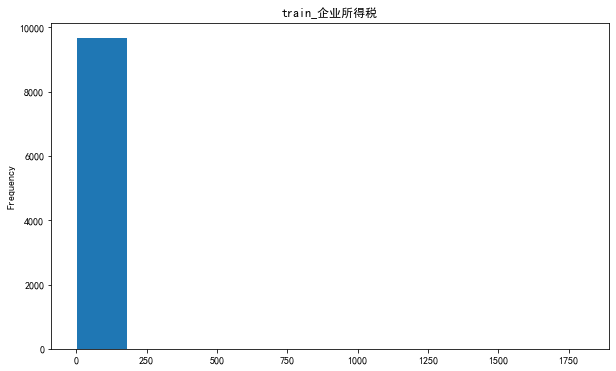

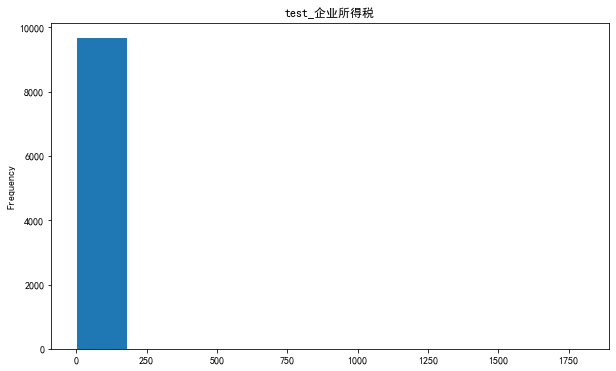

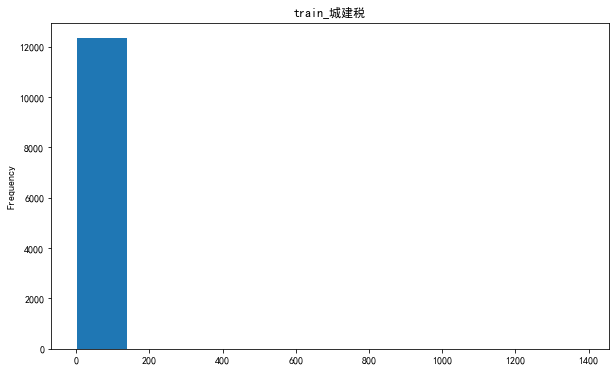

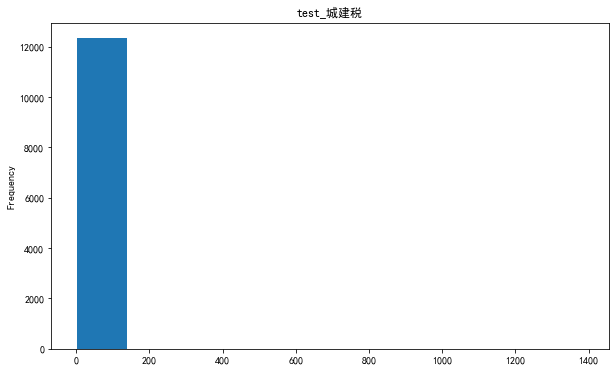

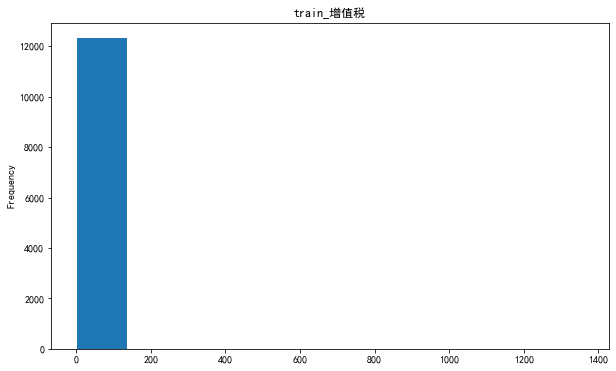

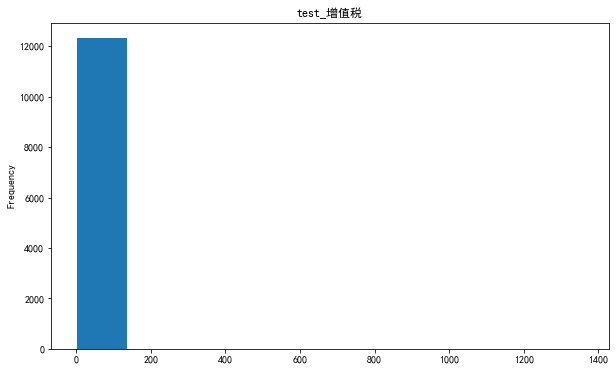

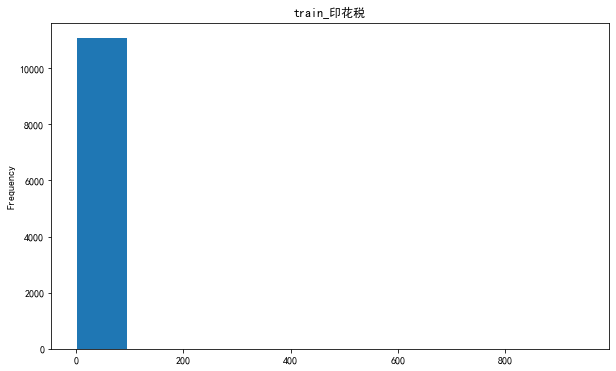

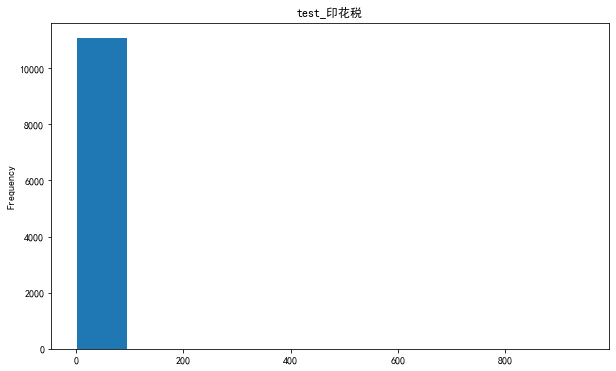

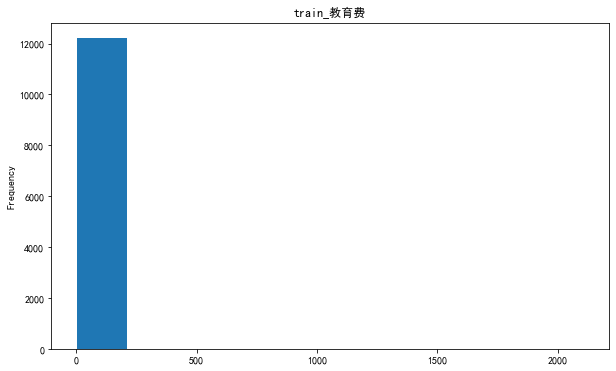

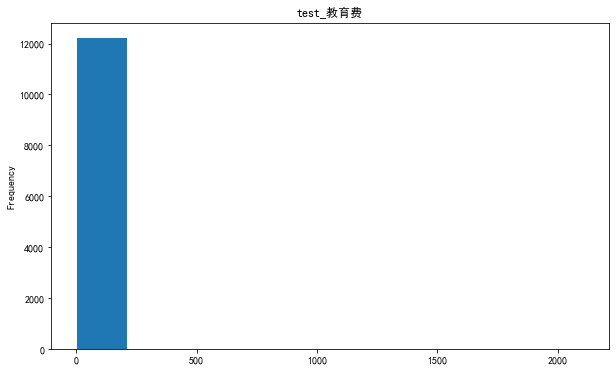

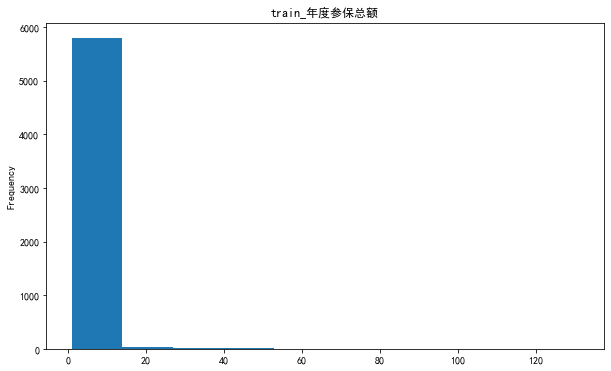

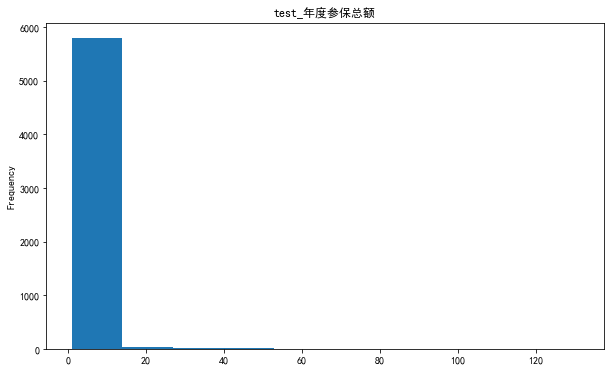

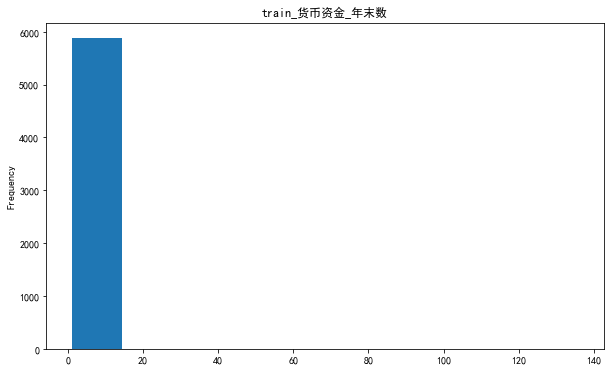

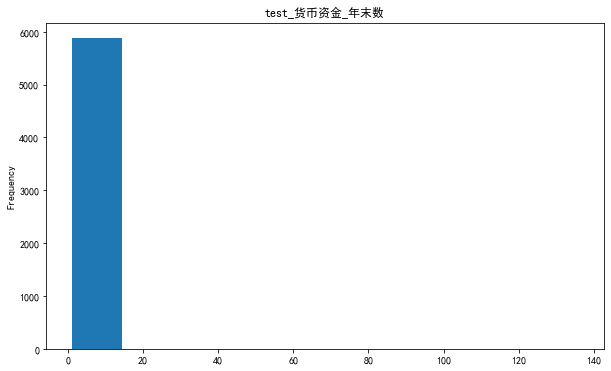

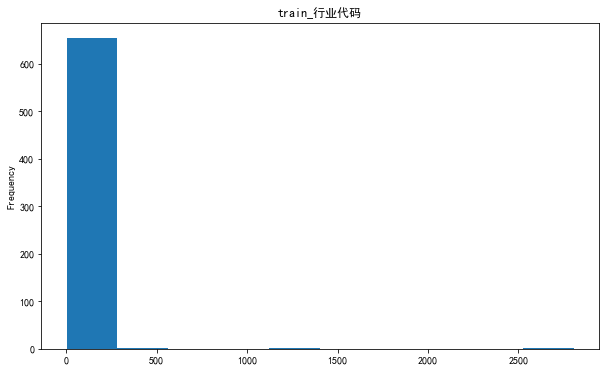

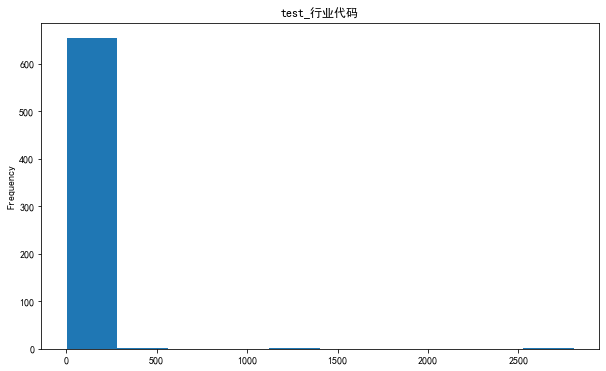

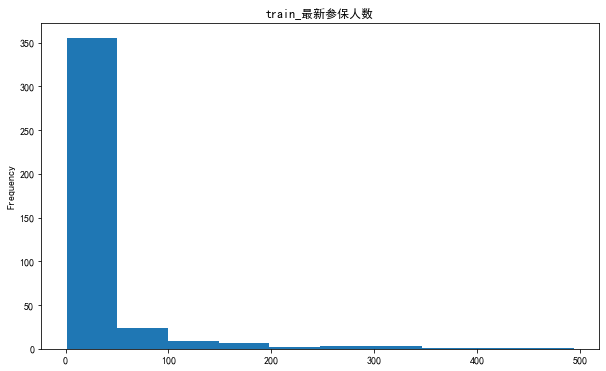

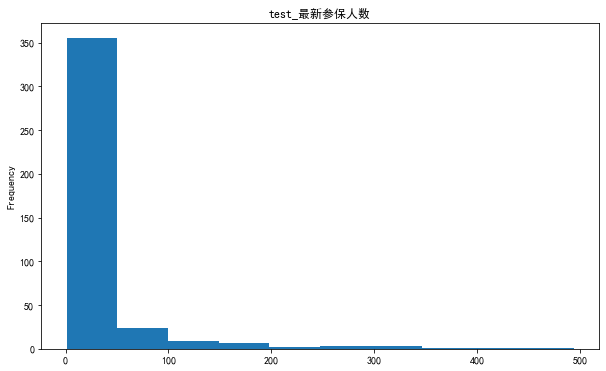

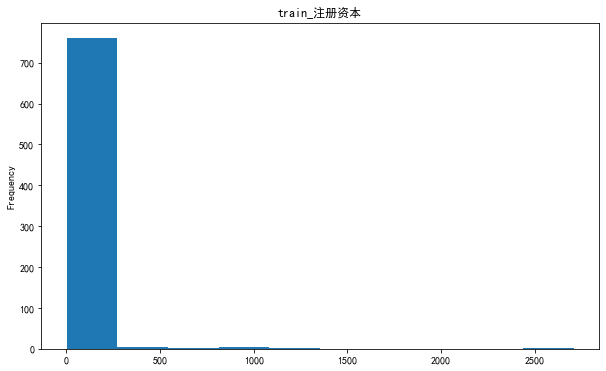

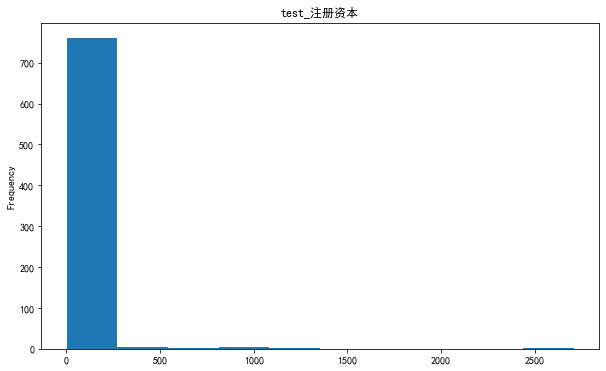

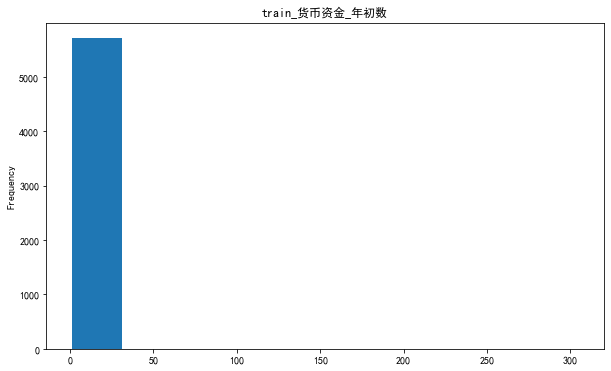

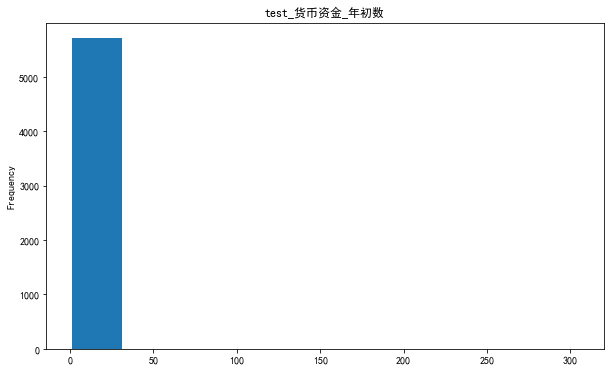

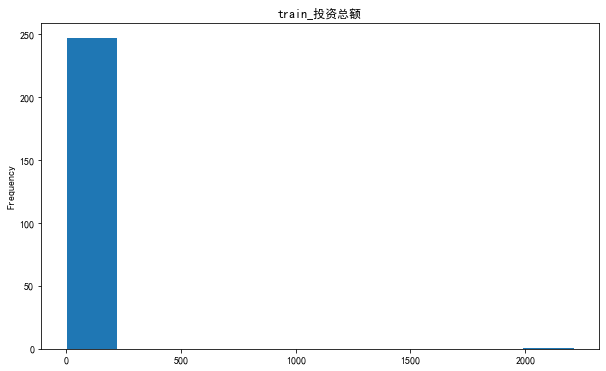

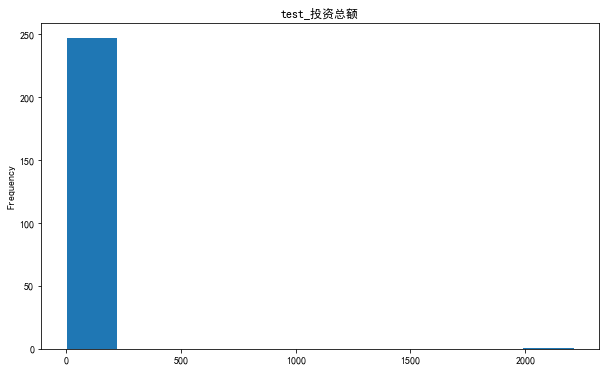

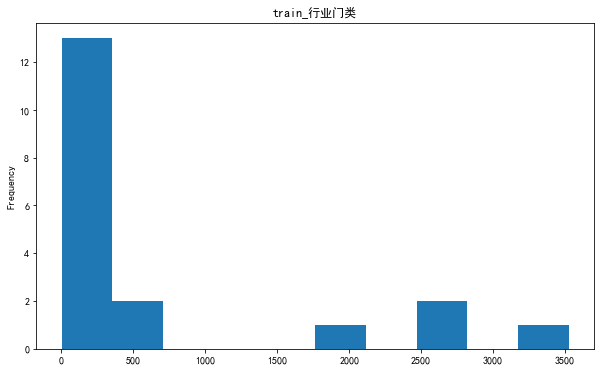

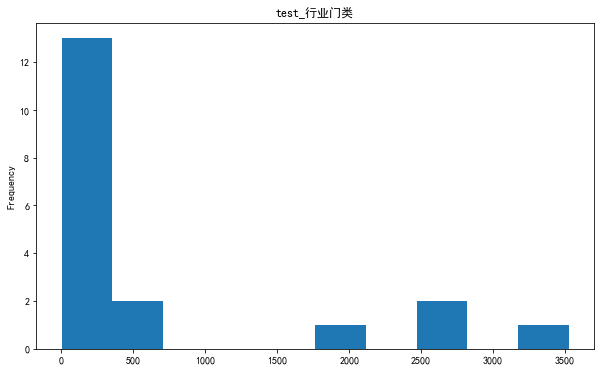

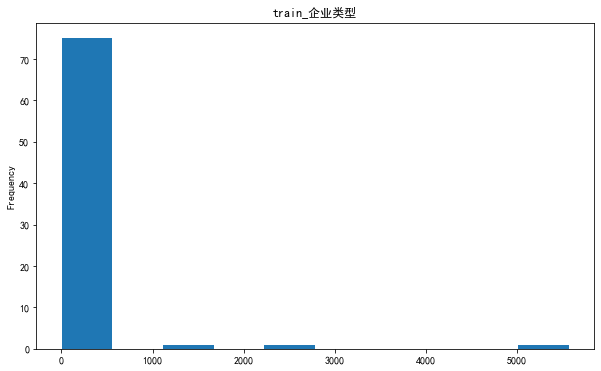

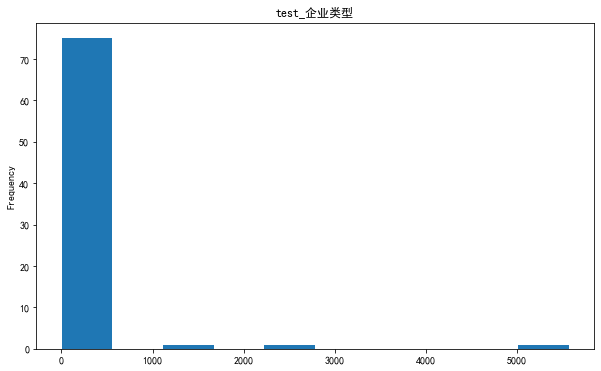

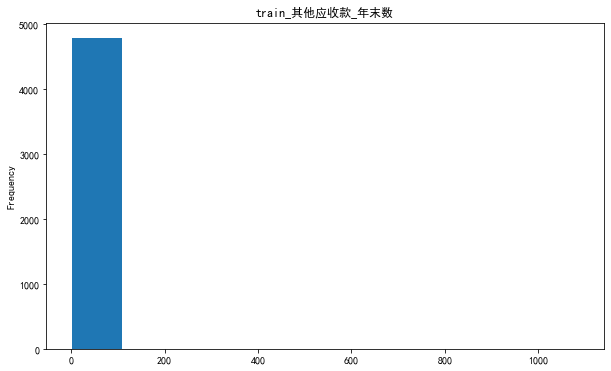

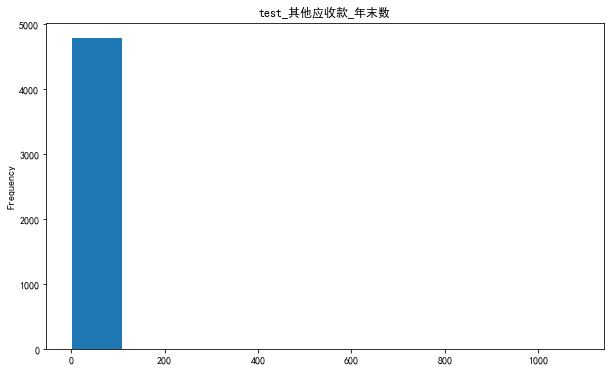

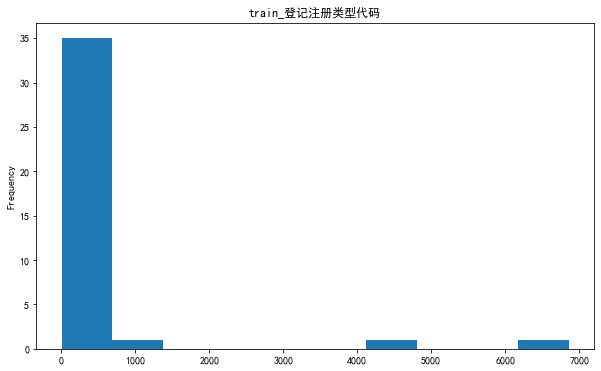

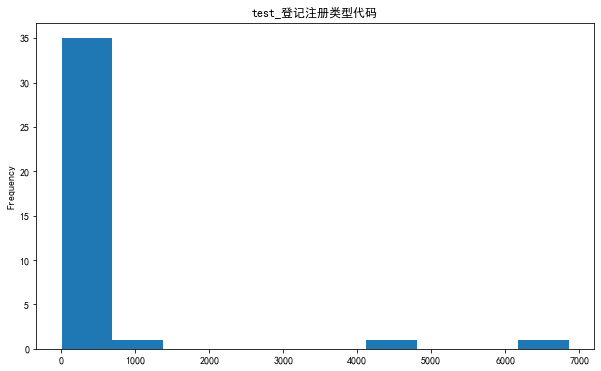

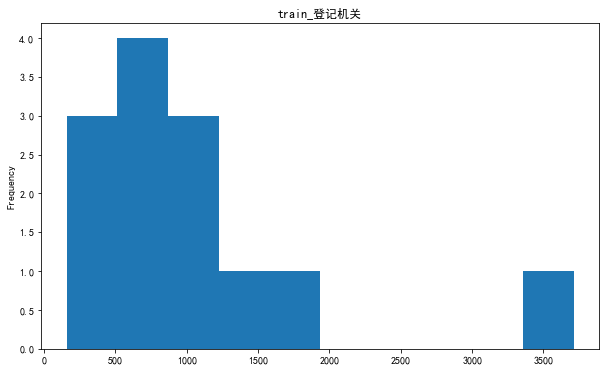

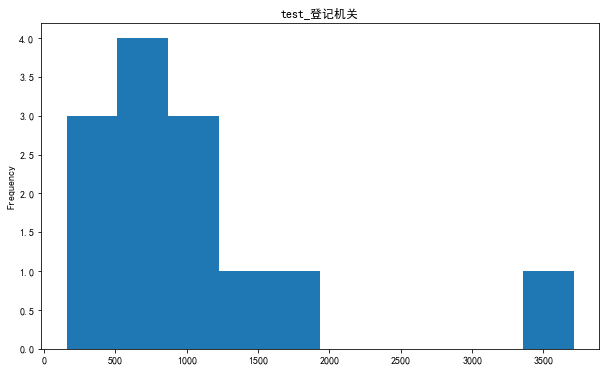

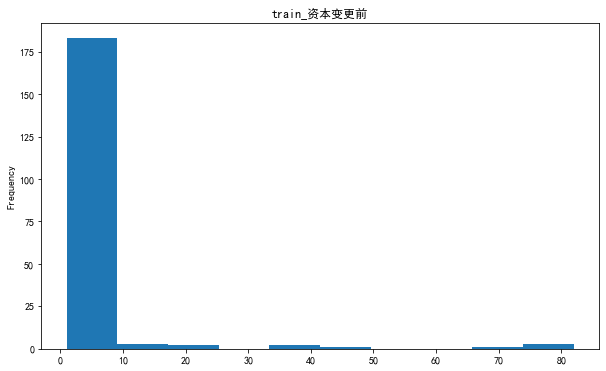

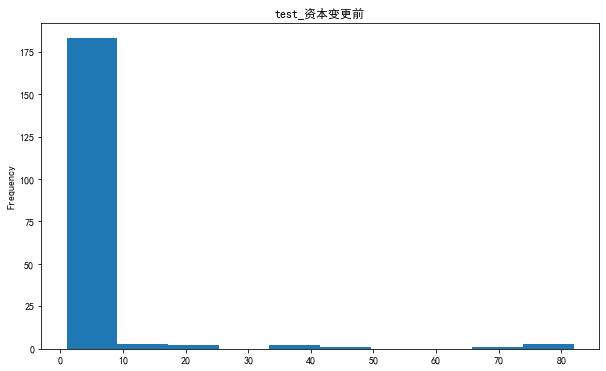

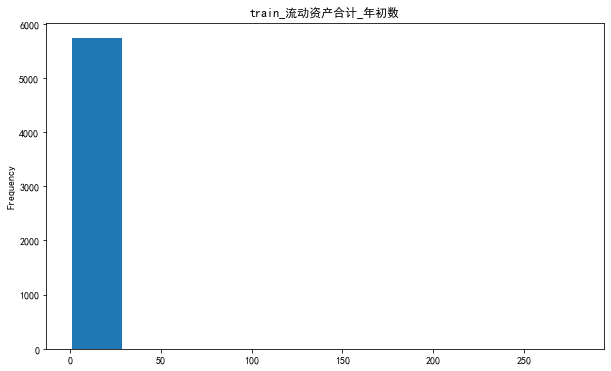

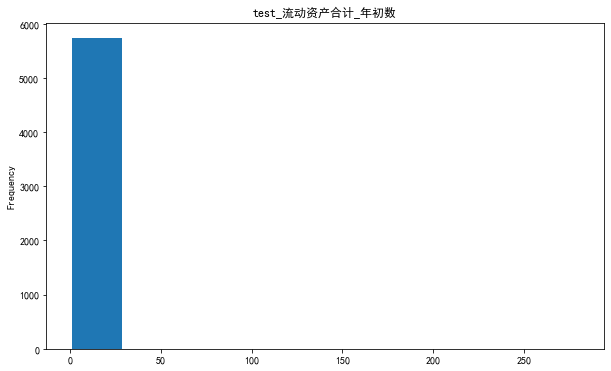

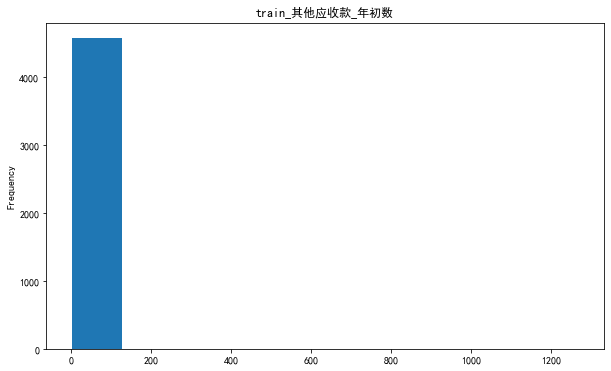

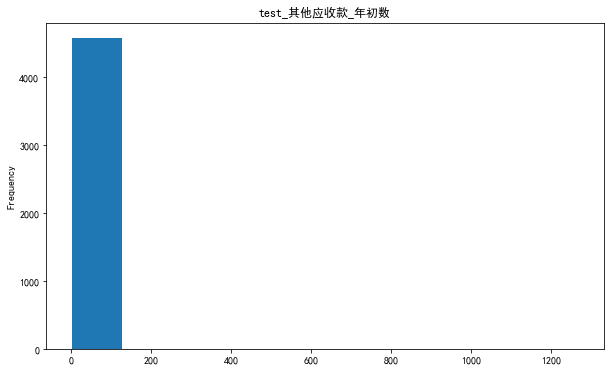

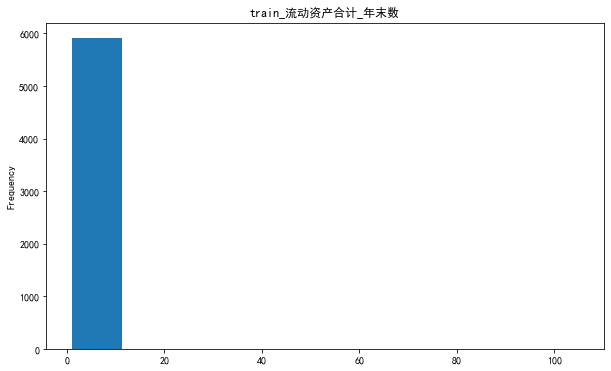

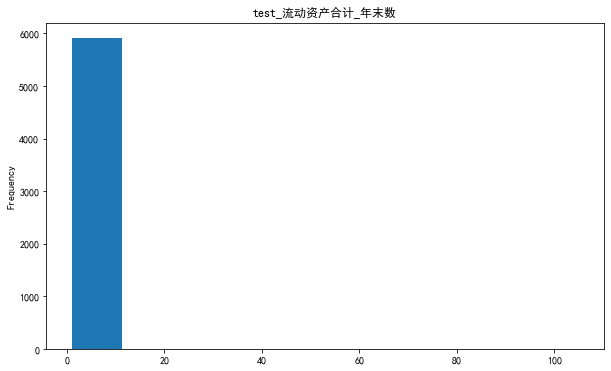

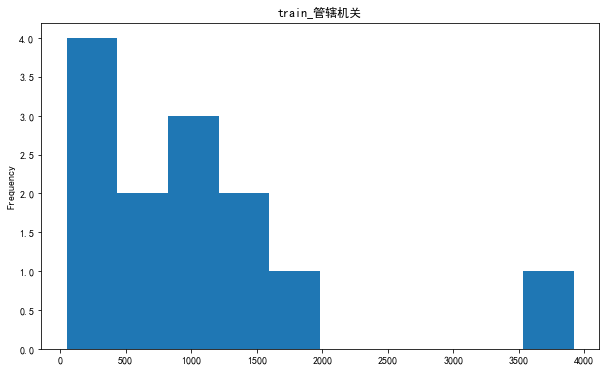

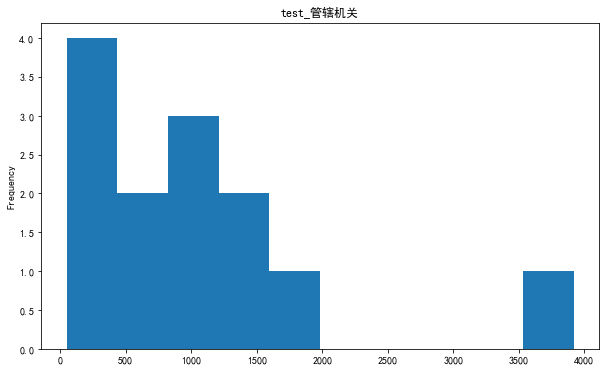

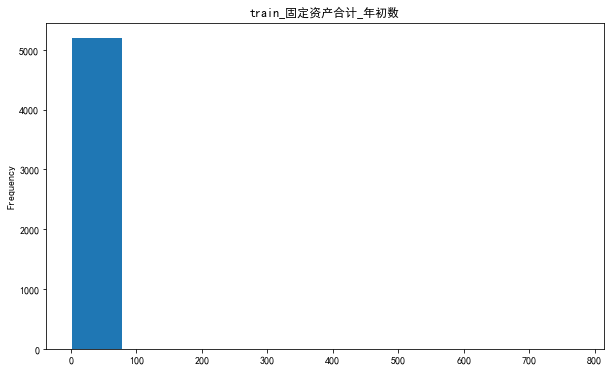

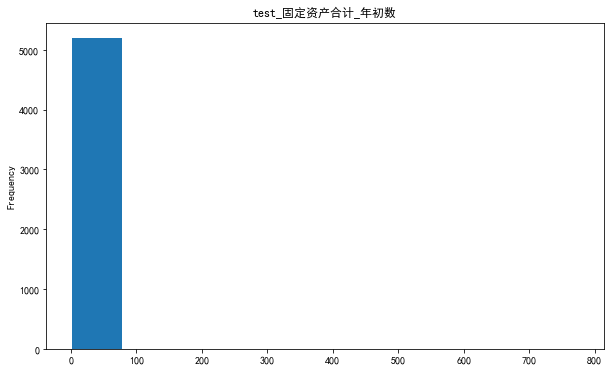

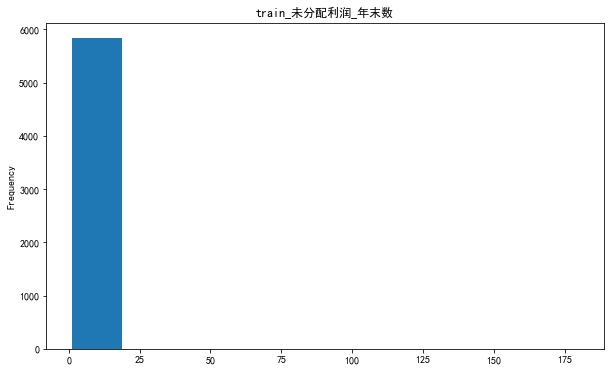

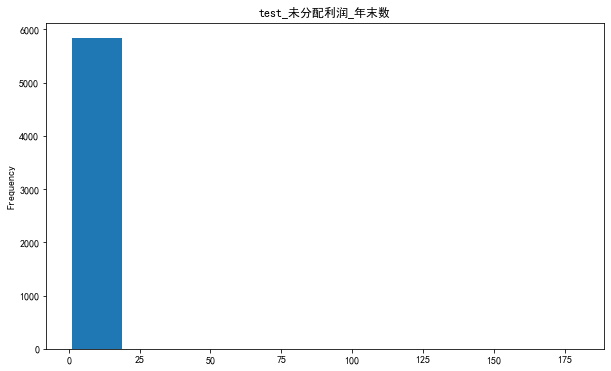

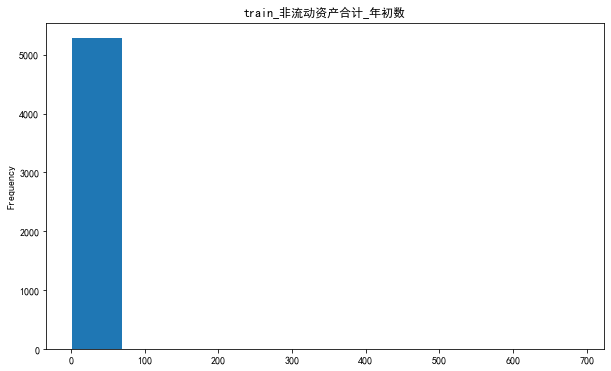

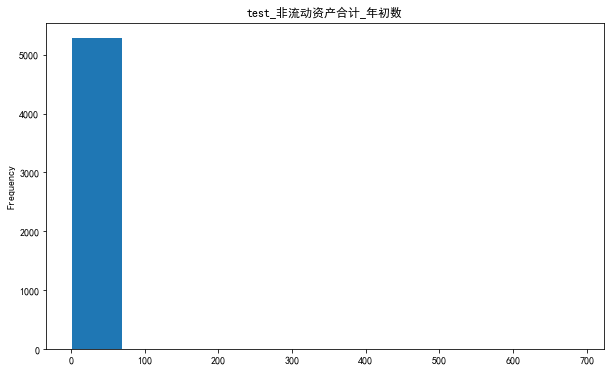

In [101]:
train = pd.read_csv('./data/train_stage2_update_20200320.csv')
test = pd.read_csv('./data/test_stage2_update_20200320.csv')
for feat in ['企业所得税','城建税','增值税','印花税','教育费','年度参保总额',
            '货币资金_年末数','行业代码','最新参保人数','注册资本','货币资金_年初数',
            '投资总额','行业门类','企业类型','其他应收款_年末数','登记注册类型代码',
            '登记机关','资本变更前','流动资产合计_年初数','其他应收款_年初数','流动资产合计_年末数',
            '管辖机关','固定资产合计_年初数','未分配利润_年末数','非流动资产合计_年初数']:
    plt.figure(figsize=(10, 6))
    train[feat].value_counts().plot(title='train_'+feat, kind='hist')
    plt.figure(figsize=(10, 6))
    train[feat].value_counts().plot(title='test_'+feat, kind='hist')

In [4]:
feat_col = ['企业所得税','城建税','增值税','印花税','教育费','年度参保总额',
            '货币资金_年末数','行业代码','最新参保人数','注册资本','货币资金_年初数',
            '投资总额','行业门类','企业类型','其他应收款_年末数','登记注册类型代码',
            '登记机关','资本变更前','流动资产合计_年初数','其他应收款_年初数','流动资产合计_年末数',
            '管辖机关','固定资产合计_年初数','未分配利润_年末数','非流动资产合计_年初数']

In [5]:
for feat in feat_col:
    print(feat, train[feat].nunique())

企业所得税 9667
城建税 12345
增值税 12324
印花税 11075
教育费 12214
年度参保总额 5856
货币资金_年末数 5879
行业代码 658
最新参保人数 406
注册资本 771
货币资金_年初数 5711
投资总额 248
行业门类 19
企业类型 78
其他应收款_年末数 4780
登记注册类型代码 38
登记机关 13
资本变更前 195
流动资产合计_年初数 5736
其他应收款_年初数 4574
流动资产合计_年末数 5911
管辖机关 13
固定资产合计_年初数 5197
未分配利润_年末数 5835
非流动资产合计_年初数 5282


In [33]:
# 尝试归一化
import math
train['new_企税'] = (train['企业所得税']-train['企业所得税'].min())/(train['企业所得税'].max()-train['企业所得税'])

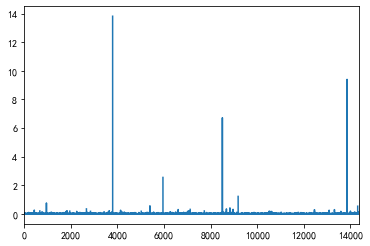

In [34]:
train['new_企税'].plot()

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


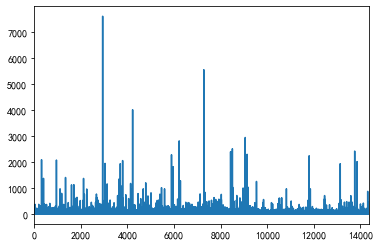

In [35]:
# 尝试统一企业缴税，观察分布是否存在规律
train = pd.read_csv('./data/train_stage2_update_20200320.csv')
test = pd.read_csv('./data/test_stage2_update_20200320.csv')
data = train.append(test)
data["企业缴税"] = np.sum(data[['增值税', '企业所得税', '印花税', '城建税', "教育费"]], axis=1)
data["企业缴税"].plot()